### !!! Assignment submitted by Milind Agarwal and Ankita Chakrabarti !!!

## Telecom_Churn_Case_Study

### Importing Dataset and important libraries


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [134]:
df=pd.read_csv("telecom_churn_data.csv")

In [3]:
df.shape

(99999, 226)

### Getting High Value Customers


In [4]:
#Getting the average recharge amount for 6 and 7 month
df['avg_rech_amt_6_7'] = ( df['total_rech_amt_6'] + df['total_rech_amt_7'] ) / 2
#Getting the data greater than 70th percentile of average recharge amount
df = df.loc[(df['avg_rech_amt_6_7'] > np.percentile(df['avg_rech_amt_6_7'], 70))] 
print(df.shape)

(29979, 227)


### Classify Data as Churn or Non Churn based on usage

#### Customers who have not used any service in the month of september(9) are classified as churn i.e. represented by 1

In [5]:
#Calculating total usage(Calls + Data)
churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
df['churn'] = np.where(df[churn_cols].sum(axis=1) == 0, 1, 0 )

In [6]:
#Count of the High value customer that churned out and those who didn't
df['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [7]:
#Calculating Churn Rate
print('Churn Rate : {0}%'.format(round(((sum(df['churn'])/len(df['churn']))*100),2)))

Churn Rate : 8.64%


#### Since churn rate is less than 10%, we have to do class imbalance

In [8]:
#Dropping the above created columns
df.drop(['avg_rech_amt_6_7'], axis=1, inplace=True)
#Segregating columns based on the months
def split_cols(df):

    col_len = len(df.columns)

    jun_data = []
    jul_data = []
    aug_data = []
    sep_data = []
    common_data = []
    date_data = []
    
    for i in range(0, col_len):
        if any(pd.Series(df.columns[i]).str.contains('_6|jun')):
            jun_data.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_7|jul')):
            jul_data.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_8|aug')):
            aug_data.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_9|sep')):
            sep_data.append(df.columns[i])
        else:
            common_data.append(df.columns[i])
        
        if any(pd.Series(df.columns[i]).str.contains('date')):
            date_data.append(df.columns[i])
            
    return jun_data,jul_data,aug_data,sep_data,common_data,date_data

In [9]:
#Get the columns split by months
jun_data, jul_data, aug_data, sep_data, common_data, date_data = split_cols(df)

In [10]:
#Dropping all the columns of september month(it has been converted to churn column)
df.drop(sep_data, axis=1, inplace=True)

In [11]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.0,29865.0,29865.0,29865.0,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,...,29979.000000,29979.000000,11387.000000,11652.000000,11741.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.587624,589.424681,535.067748,299.392147,307.701888,...,0.150339,0.140498,0.897603,0.889804,0.837322,1264.158911,129.482436,135.225368,121.450911,0.08636
std,6.846594e+05,0.0,0.0,0.0,0.0,442.848876,463.049067,492.447887,462.369385,483.432401,...,0.969779,0.975212,0.303184,0.313147,0.369087,975.181038,390.625027,408.218570,389.910814,0.28090
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.352500,365.235000,289.782000,43.030000,42.775000,...,0.000000,0.000000,1.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.951000,493.781000,452.232000,128.480000,128.120000,...,0.000000,0.000000,1.000000,1.000000,1.000000,914.000000,0.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,109.0,0.0,0.0,0.0,704.184500,700.986000,671.349500,357.655000,365.127500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1923.500000,1.600000,2.025000,0.000000,0.00000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,35.000000,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.00000


### Handling Missing Values

In [12]:
#Checking the missing value %(Columnwise)
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    0.38
std_og_t2o_mou    0.38
loc_ic_t2o_mou    0.38
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
churn             0.00
Length: 172, dtype: float64

In [13]:
#Deleting column as all value are zero or constant(i.e. 0 variance)
df2 = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [14]:
#Dropping column
To_Be_Deleted = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

for field in To_Be_Deleted:
    for month in ['6', '7', '8']:
        To_Be_Deleted = field + '_' + month
        df2 = df2.drop([To_Be_Deleted], 1)
        
print(df2.shape)

(29979, 129)


In [15]:
#Imputing Missing values in date column of every month
To_Be_Imputed = ['date_of_last_rech']

for field in To_Be_Imputed:
    for month in ['6', '7', '8']:
        To_Be_Imputed = field + '_' + month
        df2[To_Be_Imputed].fillna(df2[To_Be_Imputed].mode()[0], inplace=True)


In [16]:
#Extracting Day from date of last recharge column
df2['date_of_last_rech_6'] = pd.to_datetime(df2.date_of_last_rech_6).dt.day
df2['date_of_last_rech_7'] = pd.to_datetime(df2.date_of_last_rech_7).dt.day
df2['date_of_last_rech_8'] = pd.to_datetime(df2.date_of_last_rech_8).dt.day

#### Imputing missing observations with Median of it's column

In [17]:
missing_cols = df2.columns[df2.isnull().sum()>0]
for col in missing_cols:
    df2[col].fillna((df2[col].median()), inplace=True)

In [18]:
#Checking whether any null value still present
round(100*(df2.isnull().sum()/len(df2.index)), 2)

mobile_number    0.0
arpu_6           0.0
arpu_7           0.0
arpu_8           0.0
onnet_mou_6      0.0
                ... 
aon              0.0
aug_vbc_3g       0.0
jul_vbc_3g       0.0
jun_vbc_3g       0.0
churn            0.0
Length: 129, dtype: float64

In [19]:
df2.shape

(29979, 129)

### Outlier Treatment

In [20]:
df2.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,...,0.185296,0.173321,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,0.08636
std,6.846594e+05,442.848876,463.049067,492.447887,460.257092,481.318377,465.205131,468.998414,485.030117,473.464516,...,0.620703,0.583178,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,0.28090
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.00000
1%,7.000028e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.00000
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,0.00000


In [21]:
#Using 1.5*IQR
cols = [col for col in df2.columns if col not in ['churn','mobile_number']]
def drop_outliers(x):
    list = []
    for col in cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df2 = drop_outliers(df2)

In [22]:
#After Outlier removal
df2.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.239500e+04,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,...,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000,22395.000000
mean,7.001221e+09,566.138638,570.278962,519.903103,307.268046,315.429434,282.813742,427.388567,438.392018,393.151001,...,0.143336,0.139585,0.095244,0.098817,0.093592,1237.479705,107.194945,108.231283,94.792099,0.072293
std,6.870279e+05,308.597759,308.135341,340.176176,426.964383,437.092759,427.051188,443.002203,460.661279,437.464856,...,0.493138,0.488944,0.462868,0.490798,0.487214,952.015180,321.542215,328.019943,300.733850,0.258978
min,7.000000e+09,-160.795000,-731.935000,-43.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000030e+09,65.404260,70.147020,0.000000,0.000000,0.000000,0.000000,4.127000,3.778800,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000277e+09,284.404600,290.780600,167.146600,15.710000,15.330000,9.472000,67.442000,68.504000,42.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,300.400000,0.000000,0.000000,0.000000,0.000000
25%,7.000632e+09,369.168500,372.571500,307.444000,50.850000,50.130000,39.770000,152.210000,152.590000,121.795000,...,0.000000,0.000000,0.000000,0.000000,0.000000,481.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001225e+09,493.124000,495.369000,459.132000,142.030000,143.780000,115.810000,296.230000,300.180000,259.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,894.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001822e+09,686.584000,688.965500,662.834000,385.985000,396.195000,336.975000,539.970000,559.140000,506.045000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.000000,0.000000,0.000000,0.000000,0.000000
90%,7.002172e+09,946.708200,948.246200,930.175600,817.380000,856.908000,773.978000,925.558000,955.042000,878.322000,...,1.000000,0.000000,0.000000,0.000000,0.000000,2803.000000,364.522000,359.230000,304.526000,0.000000


#### Creating Derived Columns(and Bins)

##### Average values of 3 months for each attributes were created to check if that value could address all the months.
##### Median value of Internet usage (2G + 3G) across months was created to capture the churn rate 
##### As it was observed majority of the churn happens when the internet usage pattern shows a decline
##### The AON variable was used to create tenure buckets. It was observed larger the tenure, 
##### Lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [23]:
df2['Internet_Usage'] = df2[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
df2['Internet_Usage'] = df2.Internet_Usage.map(lambda x: 1 if x == 0 else 0)
df2 = df2.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


df2['Network_Age'] = np.round(df2['aon']/365,1)
bins = [0,2,4,6,10]
df2['Network_Age'] = pd.cut(df2['Network_Age'], bins)
df2['Network_Age'].value_counts()

(0, 2]     9655
(2, 4]     5795
(6, 10]    4539
(4, 6]     2365
Name: Network_Age, dtype: int64

In [24]:
#Creating dummy for tenure_buck 
df2 = pd.get_dummies(df2, drop_first=True)

In [25]:
df2.rename(columns={"Network_Age_(2, 4]": "Network_Age_2_to_4","Network_Age_(4, 6]":"Network_Age_4_to_6",
                   "Network_Age_(6, 10]":"Network_Age_6_to_10"}, inplace=True)

In [26]:
df2 = df2.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [27]:
df2.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22395 entries, 7 to 99988
Data columns (total 121 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mobile_number        int64  
 1   arpu_6               float64
 2   arpu_7               float64
 3   arpu_8               float64
 4   onnet_mou_6          float64
 5   onnet_mou_7          float64
 6   onnet_mou_8          float64
 7   offnet_mou_6         float64
 8   offnet_mou_7         float64
 9   offnet_mou_8         float64
 10  roam_ic_mou_6        float64
 11  roam_ic_mou_7        float64
 12  roam_ic_mou_8        float64
 13  roam_og_mou_6        float64
 14  roam_og_mou_7        float64
 15  roam_og_mou_8        float64
 16  loc_og_t2t_mou_6     float64
 17  loc_og_t2t_mou_7     float64
 18  loc_og_t2t_mou_8     float64
 19  loc_og_t2m_mou_6     float64
 20  loc_og_t2m_mou_7     float64
 21  loc_og_t2m_mou_8     float64
 22  loc_og_t2f_mou_6     float64
 23  loc_og_t2f_mou_7     float64
 24  l

### EDA

In [28]:
#Checking the behaviour of some features individually
df2['arpu_6'].astype('category').value_counts()

 0.000      62
 20.000      8
 469.707     3
 311.292     3
 0.100       3
            ..
 607.964     1
 607.973     1
 608.045     1
 608.052     1
-160.795     1
Name: arpu_6, Length: 21987, dtype: int64

In [29]:
df2['onnet_mou_7'].astype('category').value_counts()

0.00       308
128.12     110
0.45         9
2.53         7
47.33        7
          ... 
373.59       1
373.53       1
373.39       1
373.33       1
4730.64      1
Name: onnet_mou_7, Length: 15916, dtype: int64

In [30]:
df2['roam_ic_mou_7'].astype('category').value_counts()

0.00     18290
1.01        11
1.21        10
0.35         9
0.56         8
         ...  
64.56        1
64.44        1
64.33        1
64.18        1
33.66        1
Name: roam_ic_mou_7, Length: 2814, dtype: int64

In [31]:
df2['Internet_Usage'].astype('category').value_counts()

1    16028
0     6367
Name: Internet_Usage, dtype: int64

In [32]:
df2['sachet_3g_6'].astype('category').value_counts()

0    21039
1      939
2      235
3       84
4       49
5       26
6       15
7        8
Name: sachet_3g_6, dtype: int64

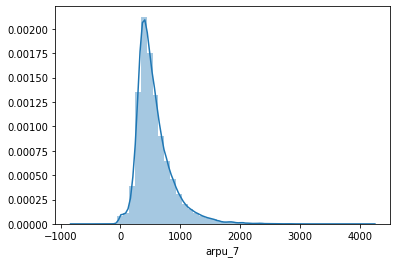

In [33]:
#Checking the scatter plot of some features
sns.distplot(df2['arpu_7'])
plt.show()

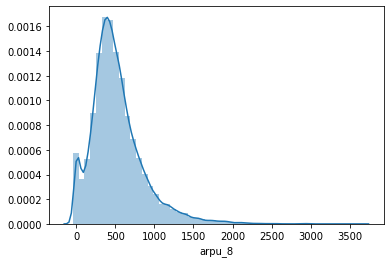

In [34]:
sns.distplot(df2['arpu_8'])
plt.show()

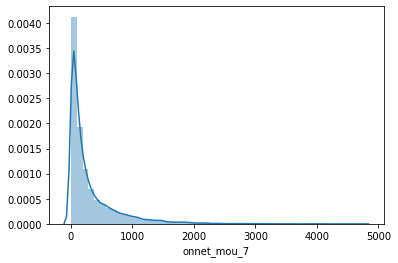

In [35]:
sns.distplot(df2['onnet_mou_7'])
plt.show()

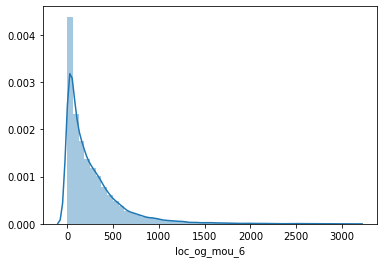

In [36]:
sns.distplot(df2['loc_og_mou_6'])
plt.show()

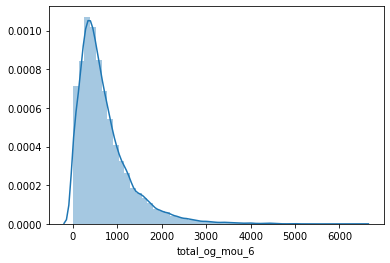

In [37]:
sns.distplot(df2['total_og_mou_6'])
plt.show()

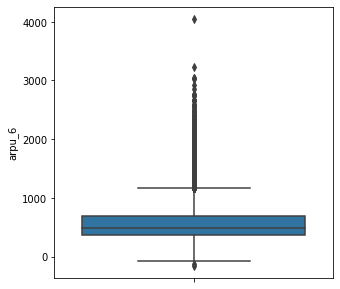

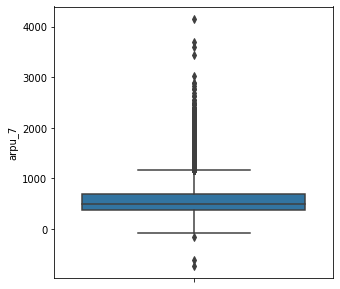

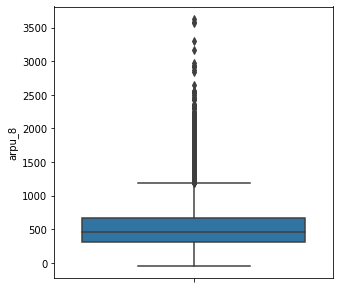

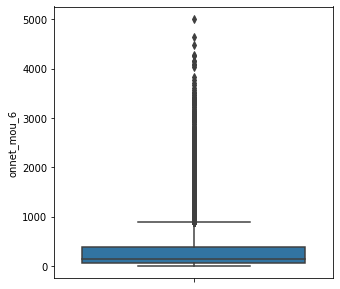

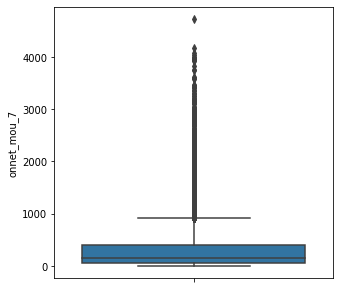

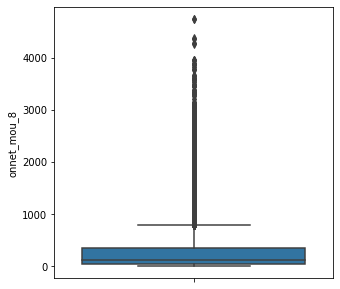

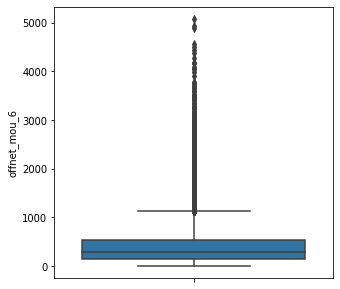

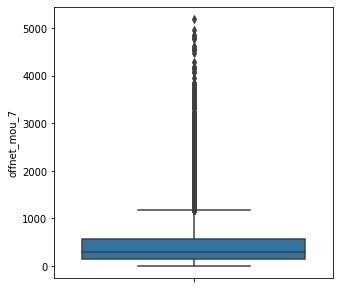

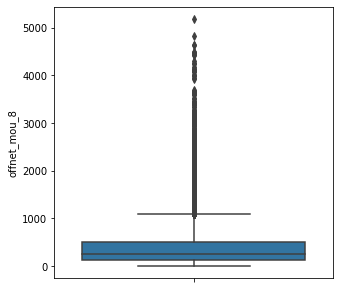

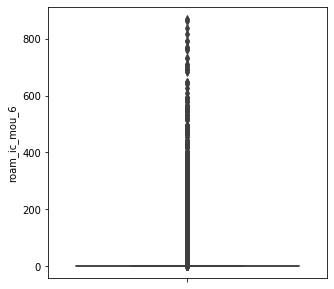

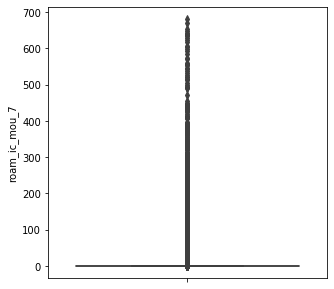

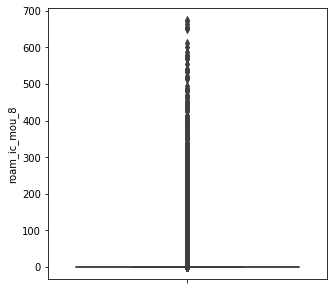

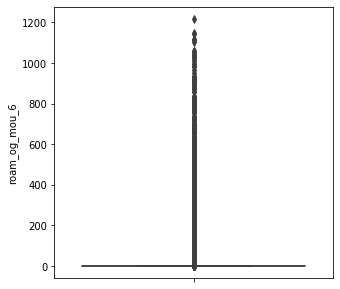

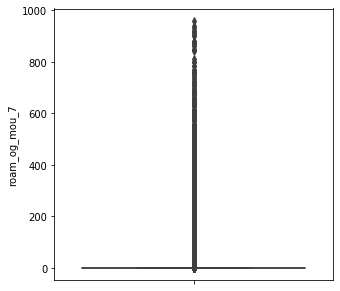

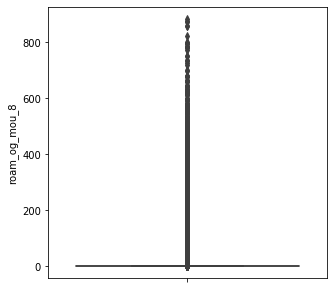

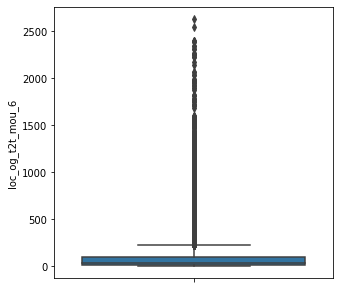

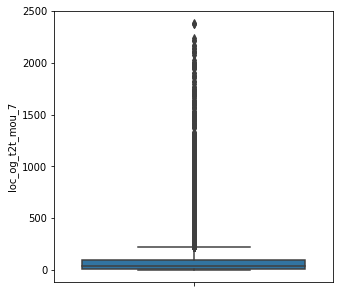

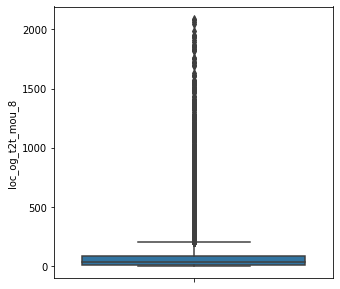

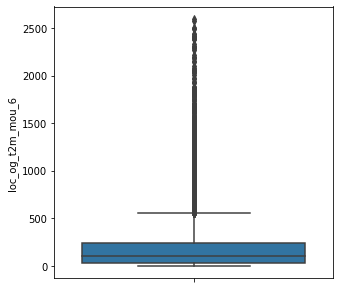

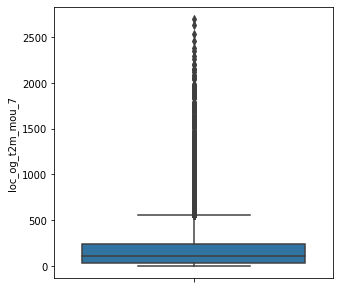

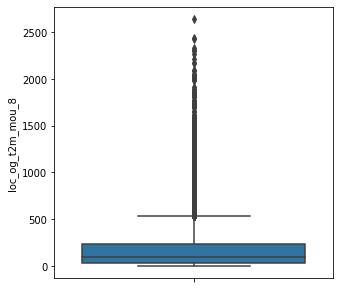

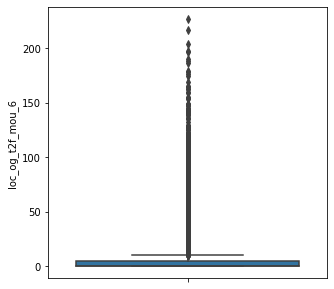

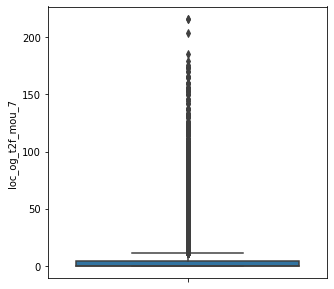

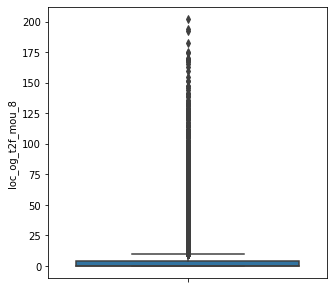

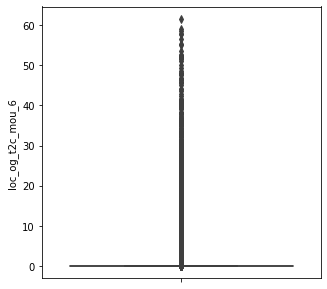

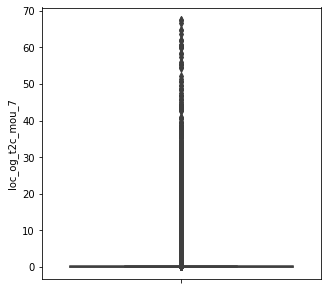

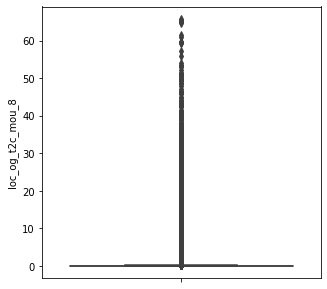

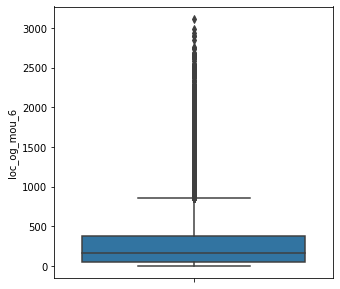

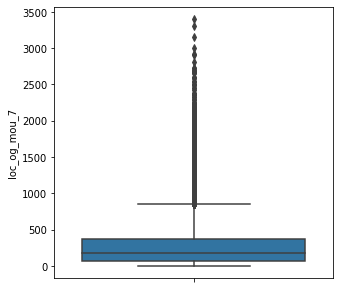

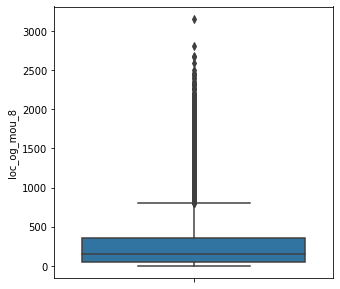

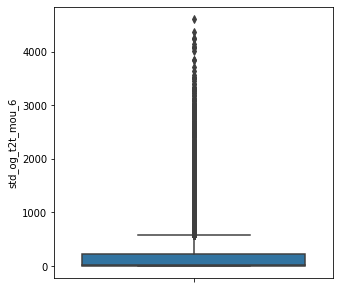

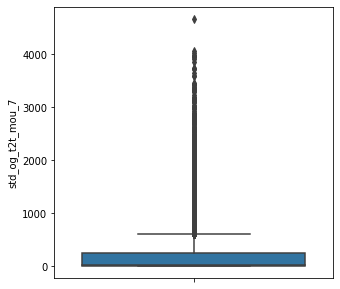

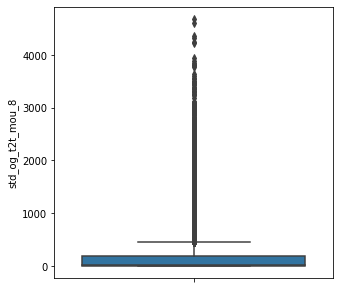

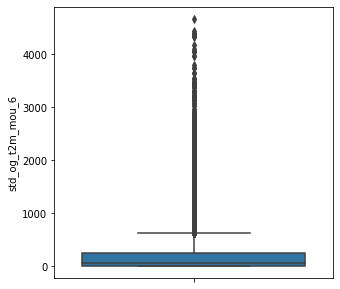

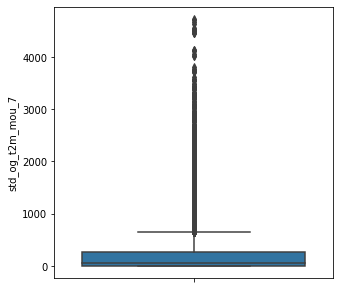

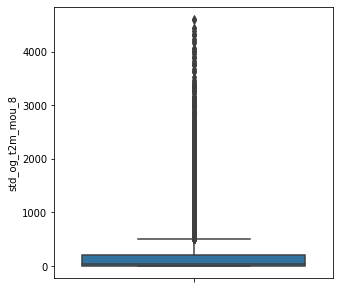

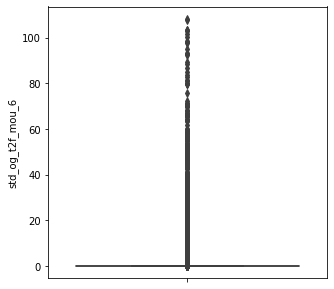

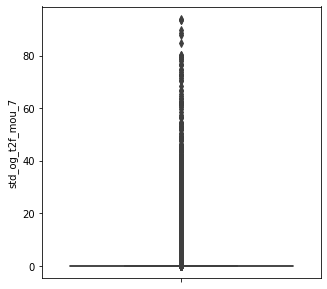

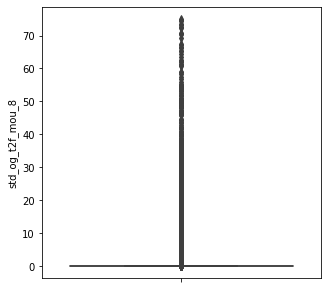

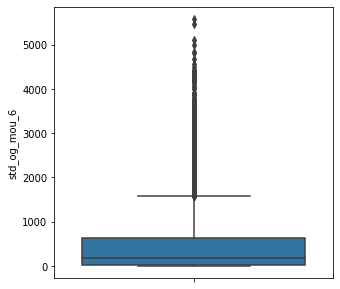

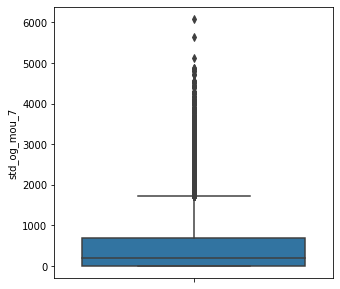

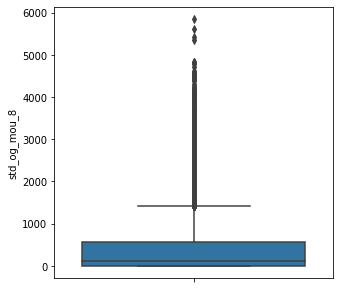

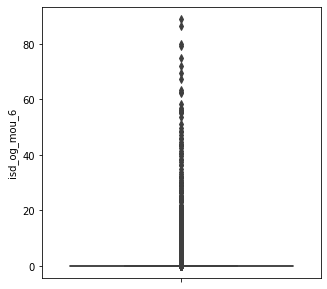

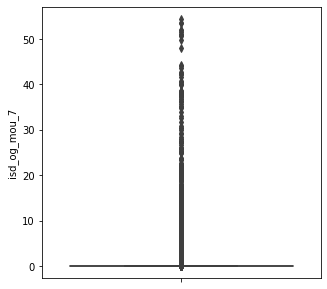

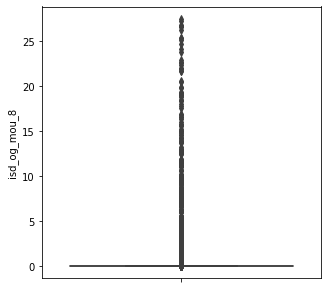

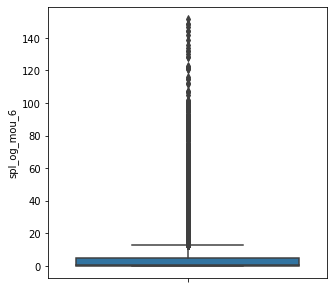

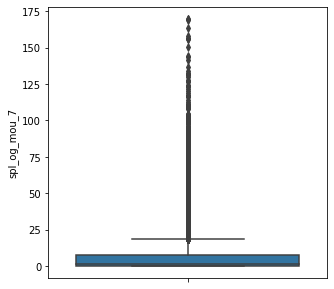

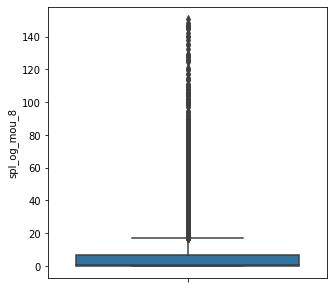

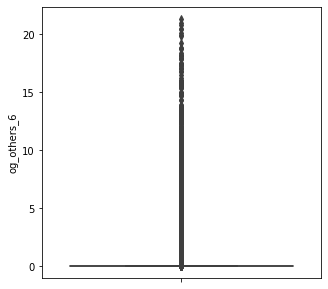

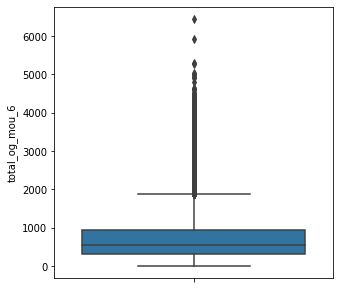

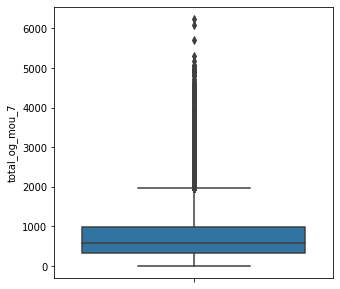

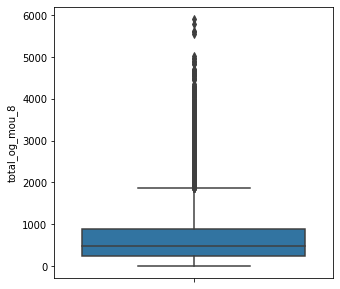

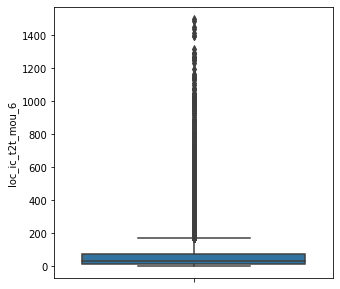

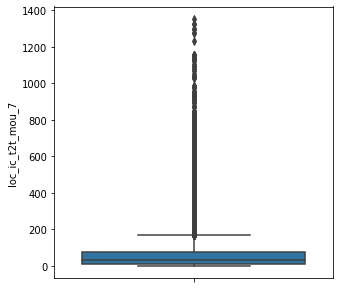

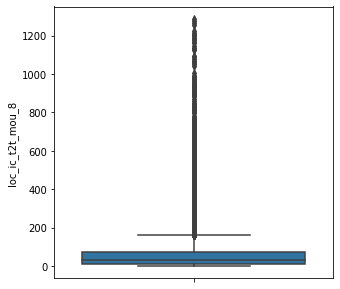

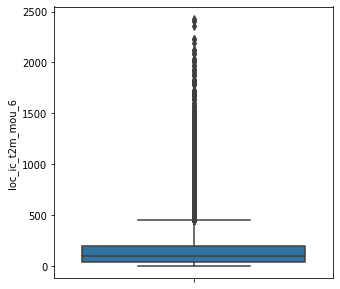

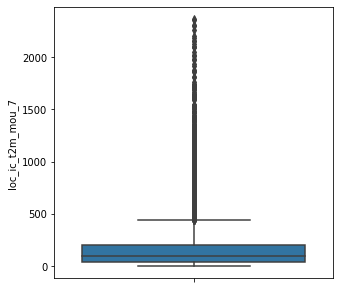

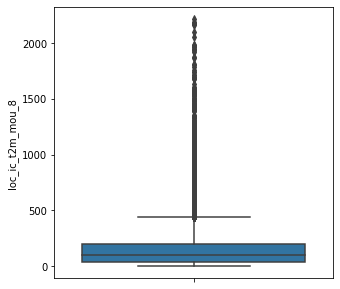

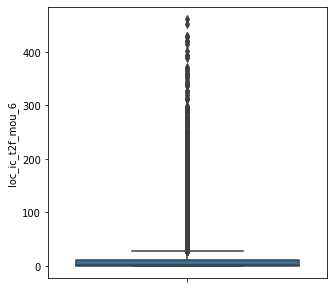

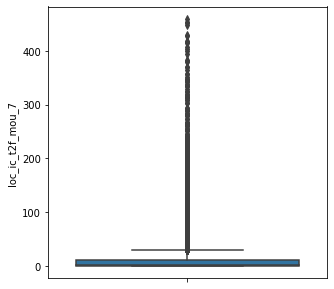

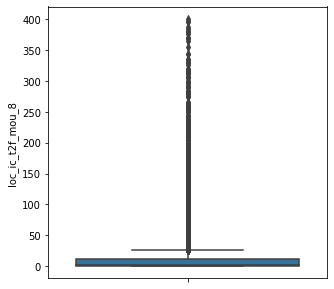

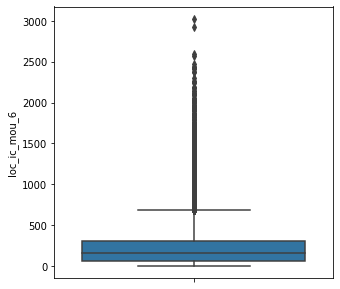

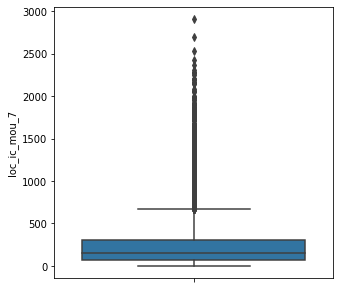

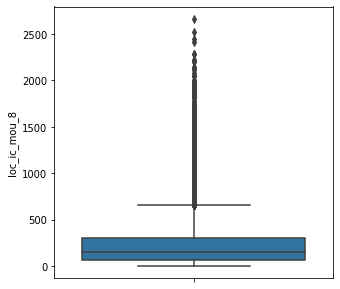

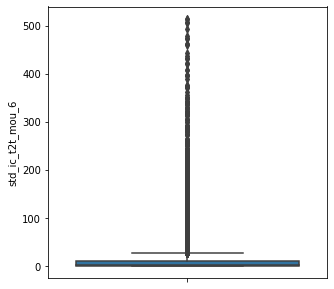

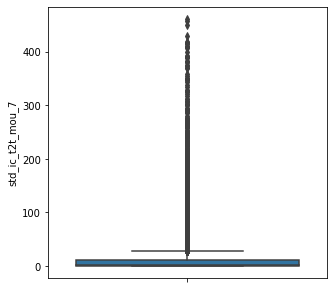

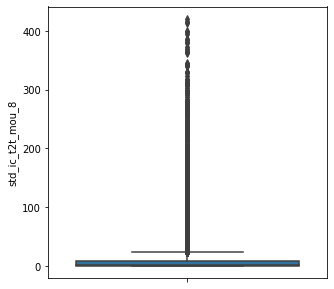

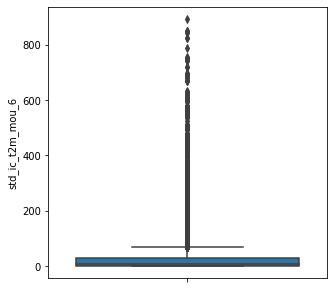

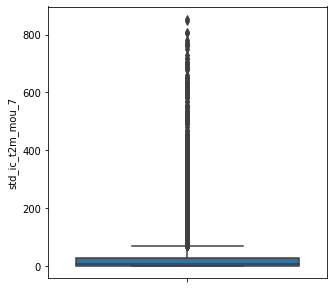

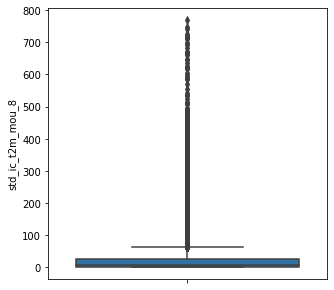

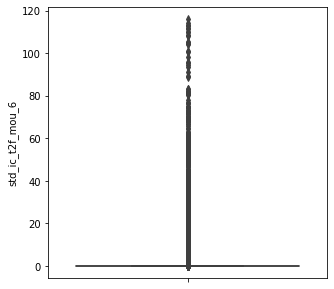

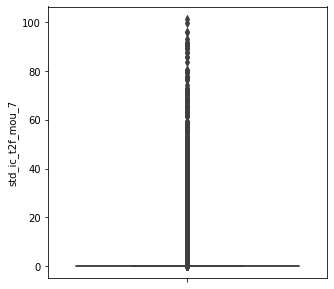

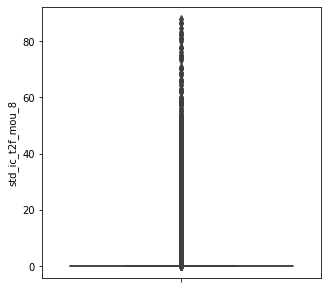

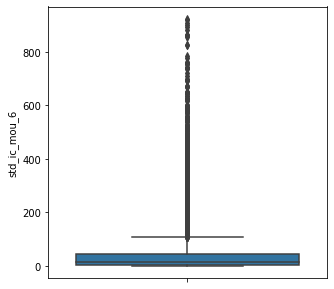

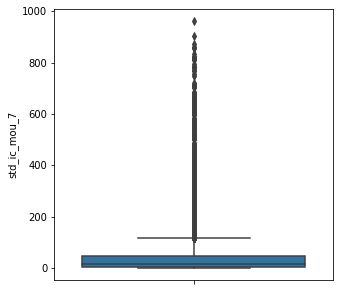

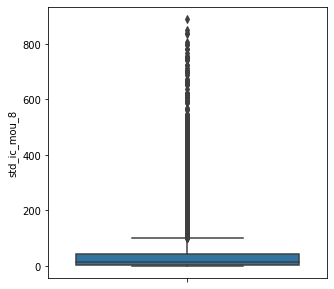

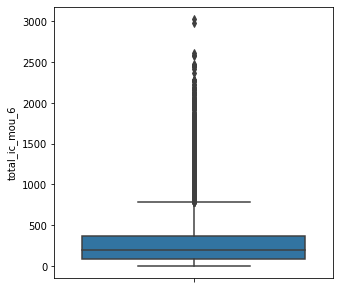

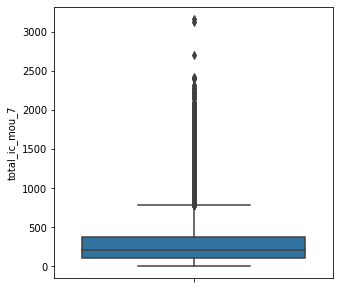

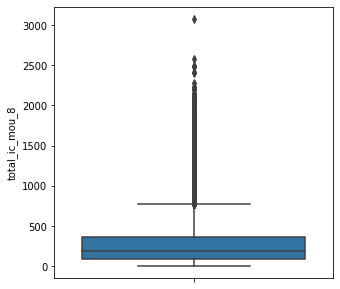

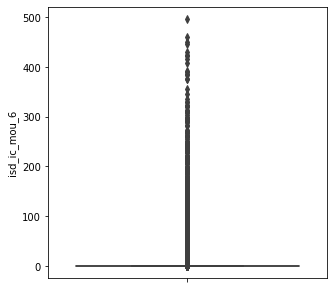

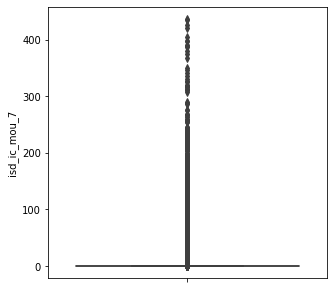

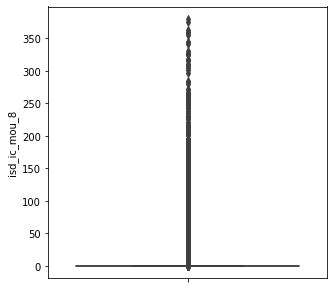

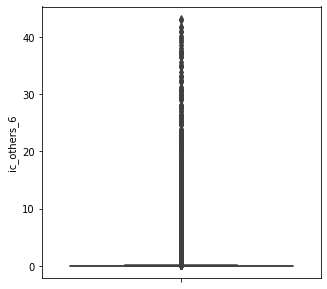

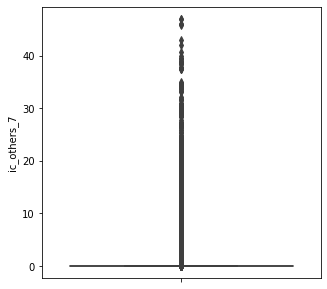

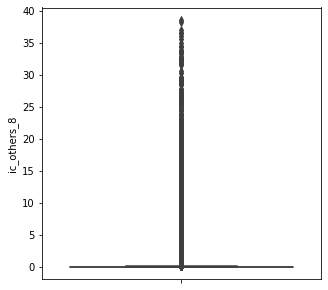

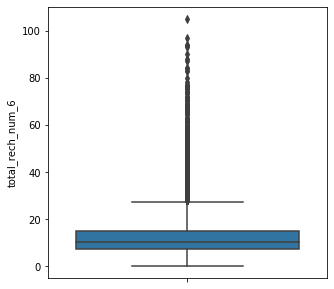

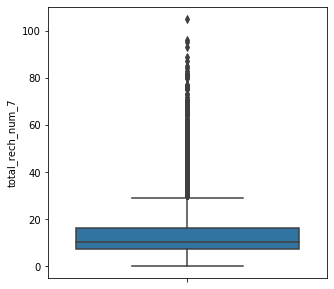

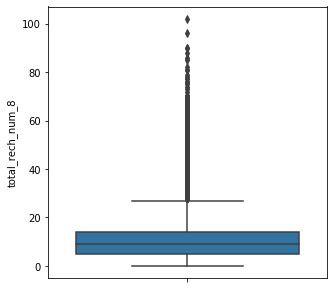

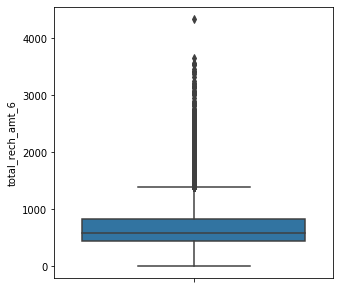

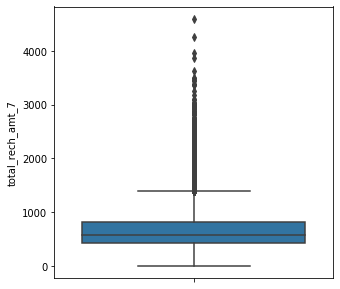

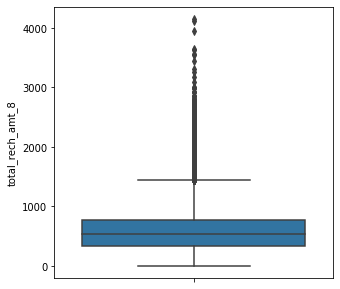

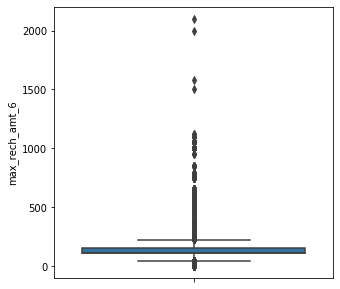

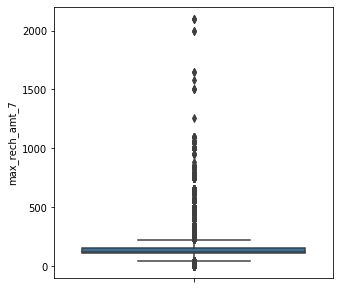

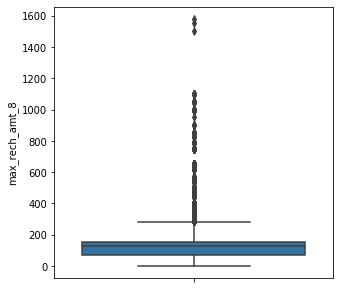

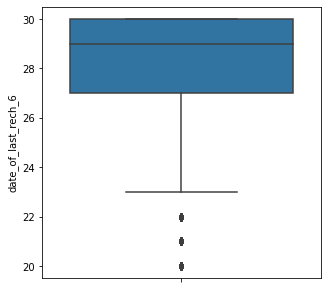

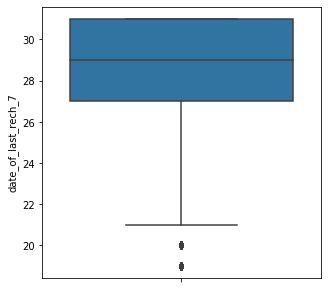

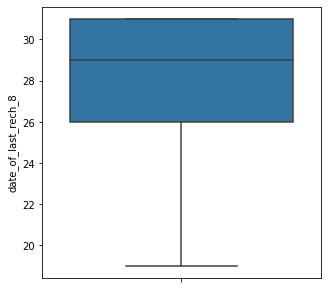

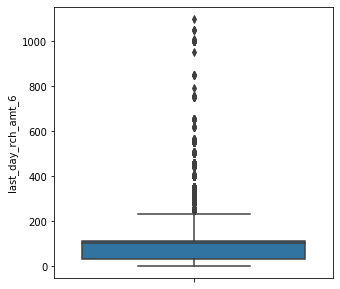

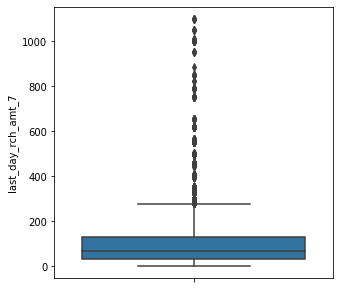

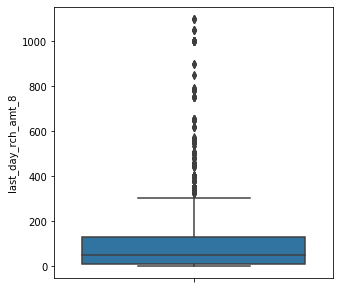

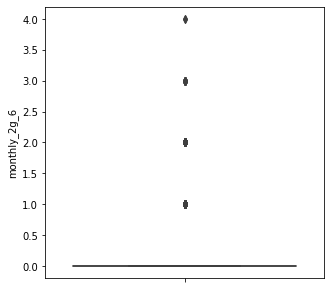

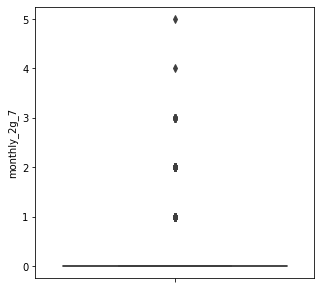

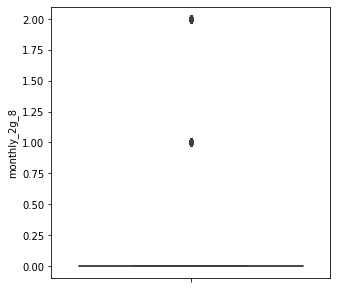

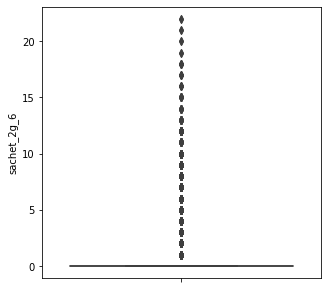

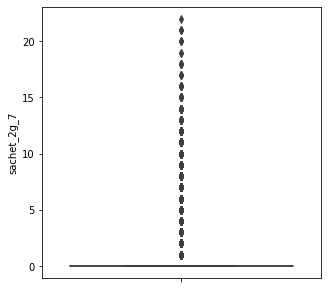

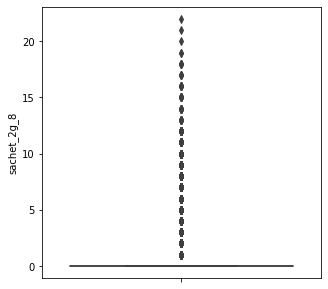

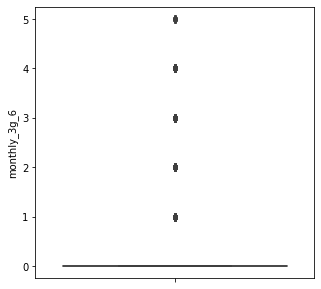

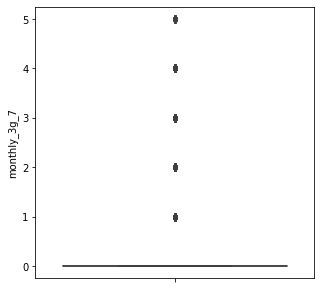

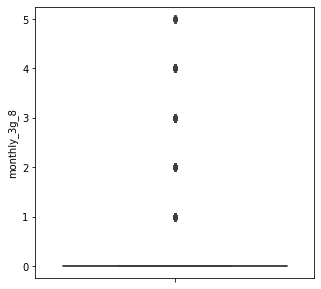

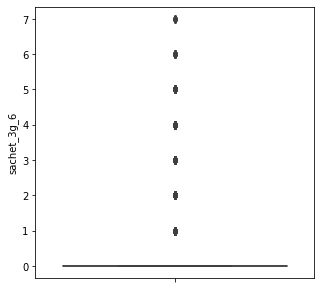

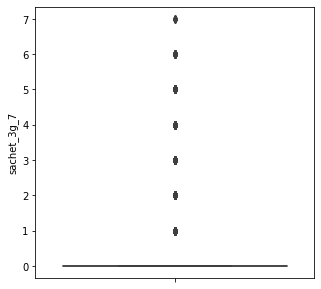

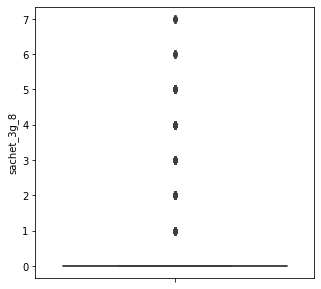

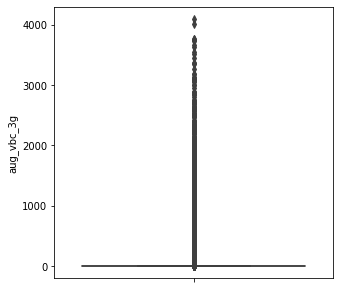

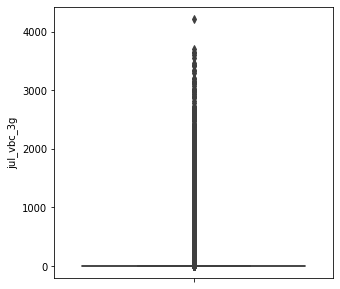

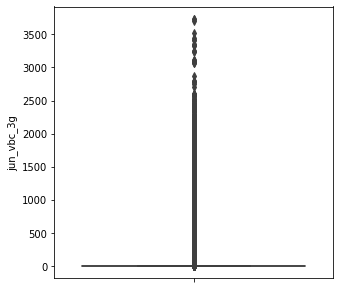

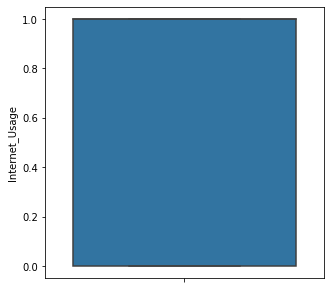

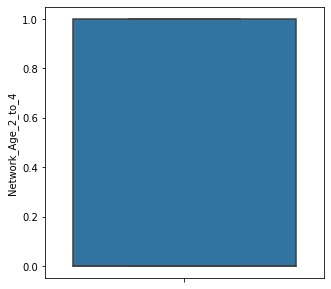

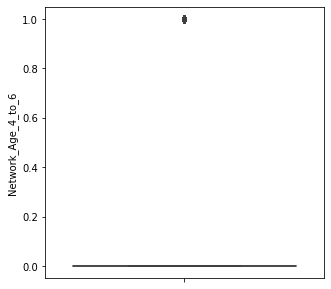

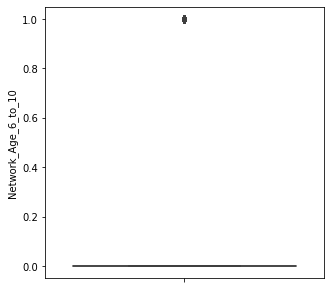

In [38]:
#Univariate Analysis BoxPlots
count_cols = [col for col in df2.columns if col not in ['churn','mobile_number']]
for col in count_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=df2)

In [39]:
df2_numeric = df2.select_dtypes(include=['float64', 'int64'])
df2_numeric.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Internet_Usage
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,0,0,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,0,0,21.03,910.65,122.16,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0,0,0,0,0,0,0.00,0.00,0.00,1
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0,0,0,0.00,0.00,0.00,1
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,1,1,3,0,358.10,2706.83,1714.67,0


In [40]:
#Dropping the mobile_number column
df2_numeric = df2_numeric.drop(['mobile_number'], axis=1)

In [41]:
df2_numeric.count()

arpu_6            22395
arpu_7            22395
arpu_8            22395
onnet_mou_6       22395
onnet_mou_7       22395
                  ...  
sachet_3g_8       22395
aug_vbc_3g        22395
jul_vbc_3g        22395
jun_vbc_3g        22395
Internet_Usage    22395
Length: 116, dtype: int64

In [43]:
#PAIR-PLOTS
#plt.figure(figsize=(20, 10))
#sns.pairplot(df2_numeric)
#plt.show()

In [44]:
#As pair plots are difficult to understand(and in here takes too much time to load), corr() is used.
cor = df2_numeric.corr()
cor

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Internet_Usage
arpu_6,1.000000,0.528177,0.429954,0.401223,0.203272,0.162865,0.551468,0.301047,0.256481,0.094665,...,0.243829,0.139376,0.163576,0.051345,0.015500,0.014582,0.136716,0.133886,0.182615,-0.105710
arpu_7,0.528177,1.000000,0.647010,0.208570,0.385092,0.300777,0.330557,0.543954,0.414940,0.077924,...,0.148685,0.250460,0.192442,0.009783,0.053358,0.016092,0.158683,0.163957,0.117900,-0.115642
arpu_8,0.429954,0.647010,1.000000,0.130399,0.255879,0.435828,0.228526,0.360448,0.578188,0.084053,...,0.145692,0.177256,0.294002,0.017245,0.029131,0.067958,0.218024,0.140503,0.130106,-0.143632
onnet_mou_6,0.401223,0.208570,0.130399,1.000000,0.731031,0.591296,-0.039001,-0.087981,-0.077631,-0.010983,...,-0.076528,-0.081208,-0.075240,-0.053740,-0.053832,-0.051387,-0.097088,-0.102223,-0.095780,0.164783
onnet_mou_7,0.203272,0.385092,0.255879,0.731031,1.000000,0.788387,-0.086027,-0.044676,-0.046097,0.017419,...,-0.080882,-0.078519,-0.076788,-0.061737,-0.053980,-0.050682,-0.099522,-0.102808,-0.103527,0.170870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sachet_3g_8,0.014582,0.016092,0.067958,-0.051387,-0.050682,-0.039366,-0.040347,-0.047039,-0.027568,-0.003722,...,0.073242,0.081883,0.058566,0.418868,0.533691,1.000000,0.109100,0.103774,0.096781,-0.248713
aug_vbc_3g,0.136716,0.158683,0.218024,-0.097088,-0.099522,-0.078097,-0.058807,-0.064170,-0.033457,0.022091,...,0.361966,0.431433,0.493150,0.119215,0.104993,0.109100,1.000000,0.725969,0.619053,-0.457858
jul_vbc_3g,0.133886,0.163957,0.140503,-0.102223,-0.102808,-0.085840,-0.068175,-0.072186,-0.045804,0.008135,...,0.408131,0.470231,0.399672,0.141851,0.122276,0.103774,0.725969,1.000000,0.703296,-0.457390
jun_vbc_3g,0.182615,0.117900,0.130106,-0.095780,-0.103527,-0.081697,-0.060176,-0.074068,-0.046161,0.009659,...,0.475129,0.387674,0.371074,0.150499,0.112521,0.096781,0.619053,0.703296,1.000000,-0.430906


In [45]:
df2_numeric.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'Internet_Usage'],
      dtype='object', length=116)

In [46]:
#Plotting correlations on a heatmap

#Figure size
plt.figure(figsize=(35,27))

# heatmap
sns.heatmap(cor, cmap="BuPu", annot=True)
plt.show()

<Figure size 2520x1944 with 0 Axes>

<Figure size 2520x1944 with 0 Axes>

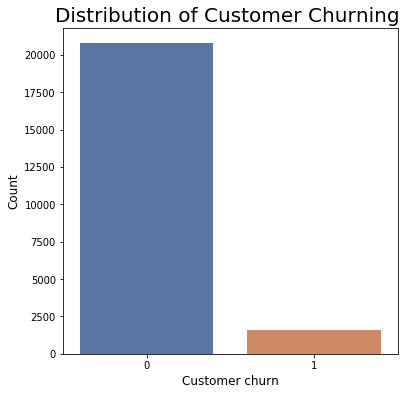

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x = df2.churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()

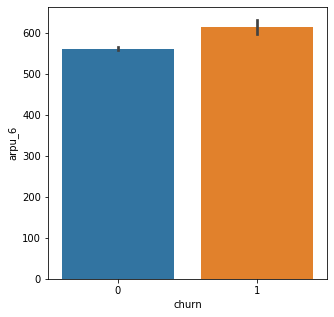

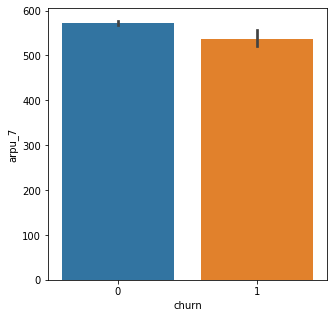

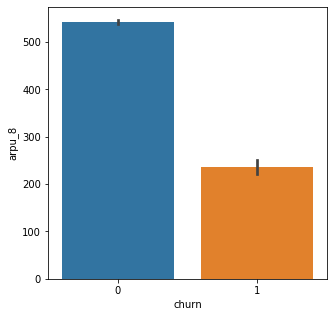

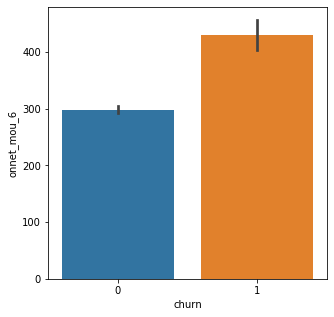

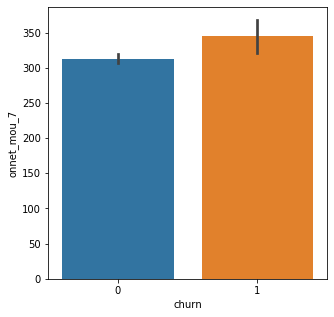

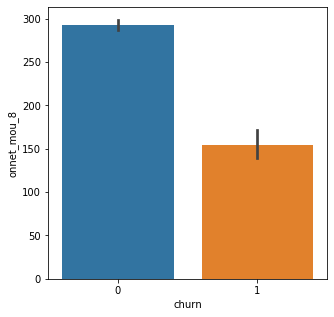

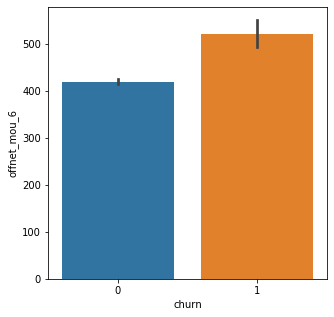

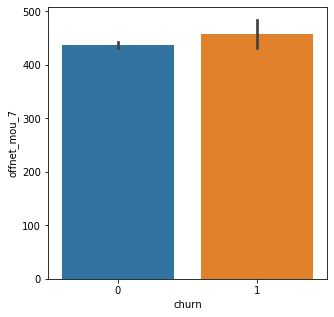

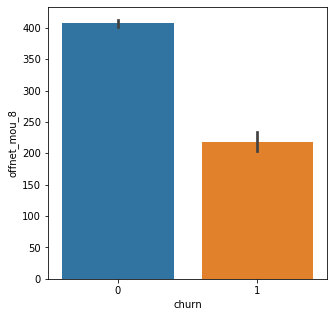

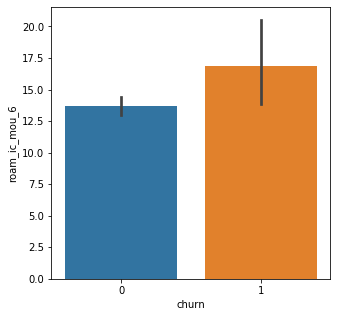

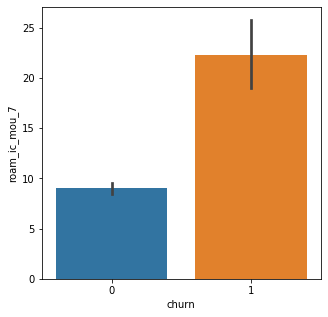

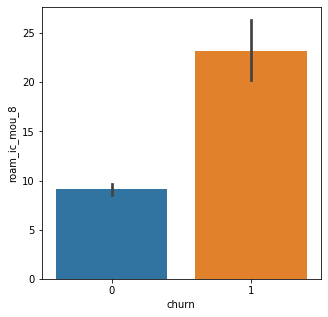

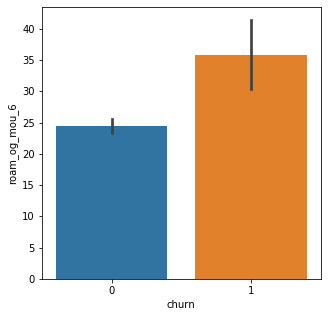

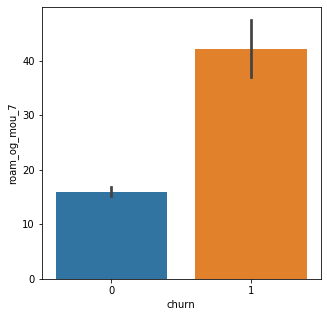

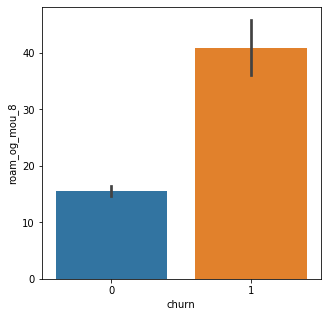

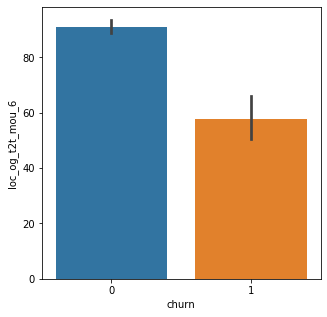

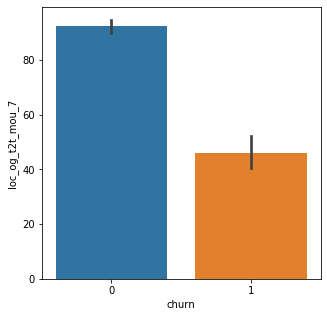

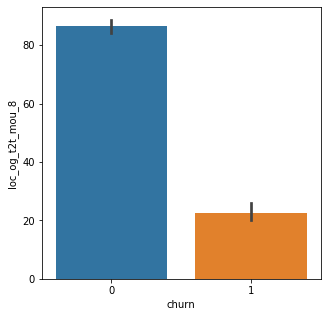

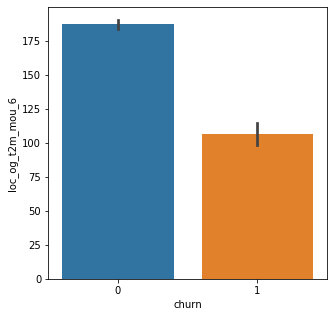

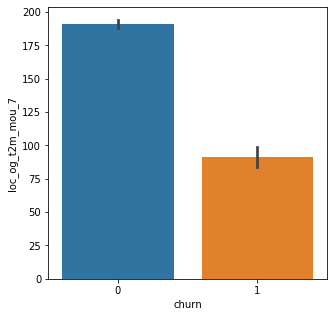

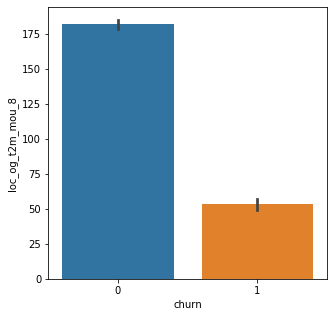

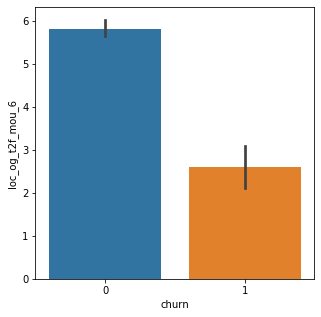

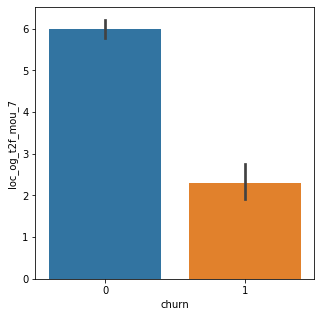

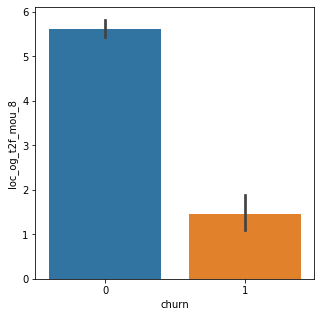

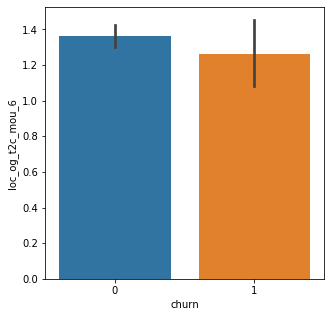

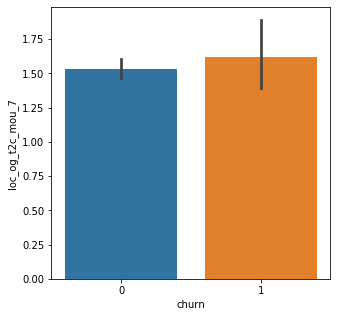

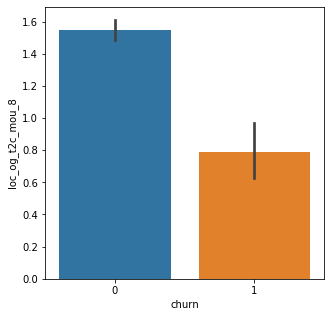

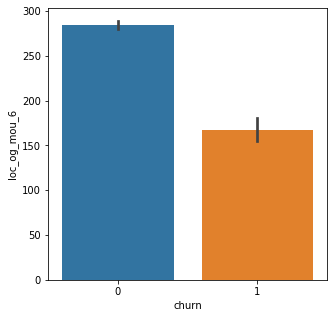

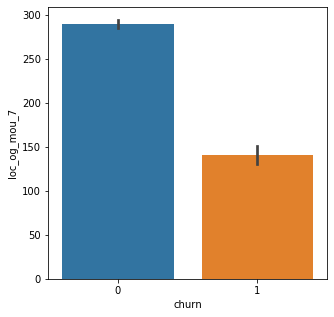

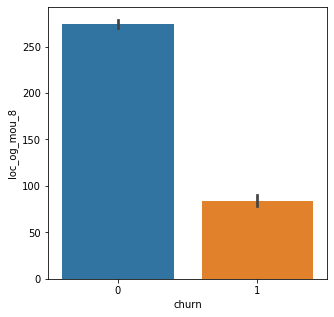

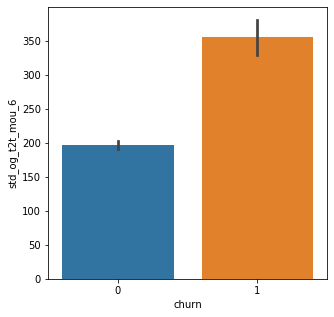

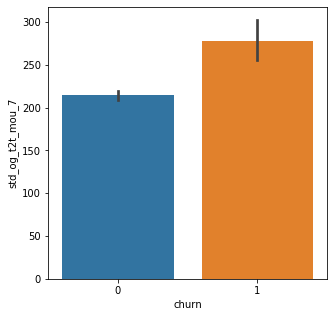

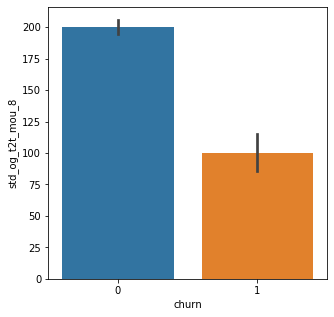

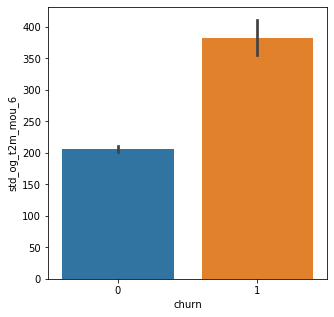

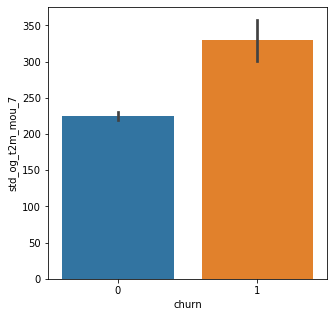

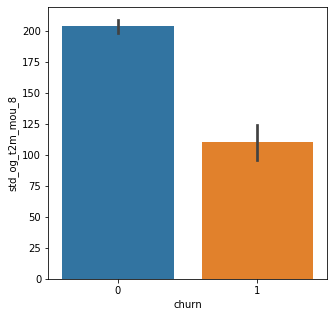

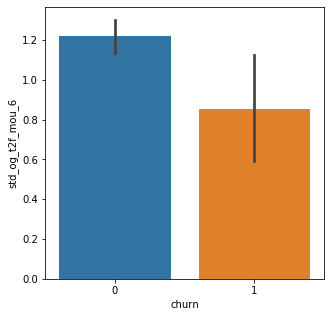

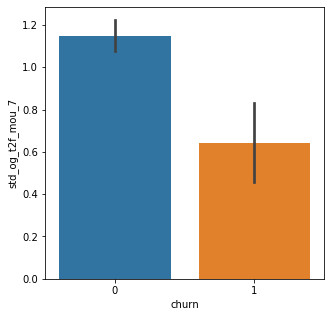

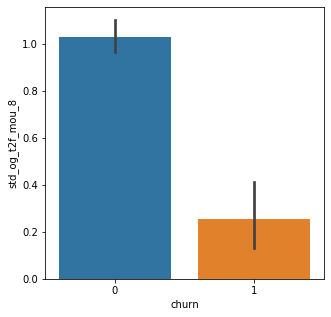

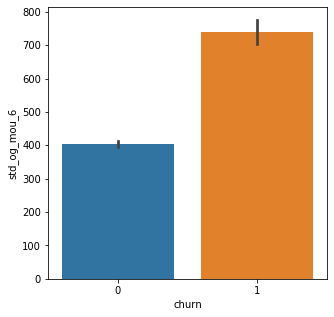

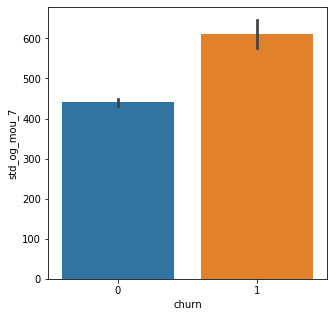

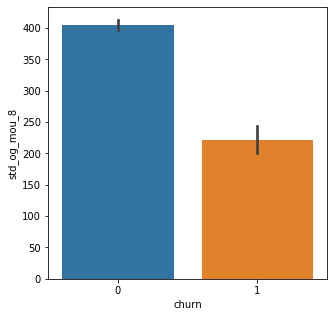

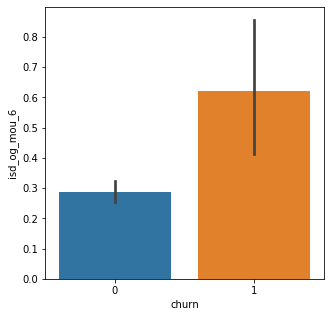

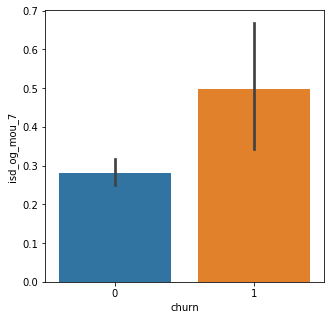

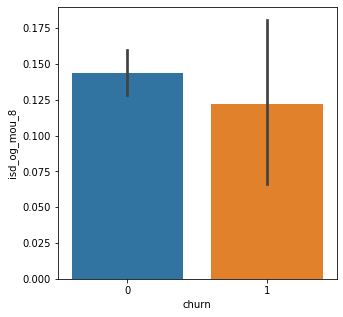

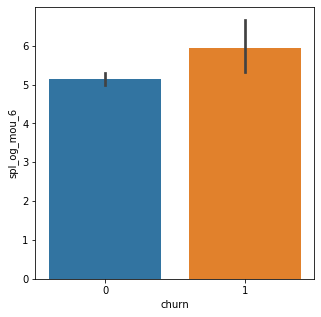

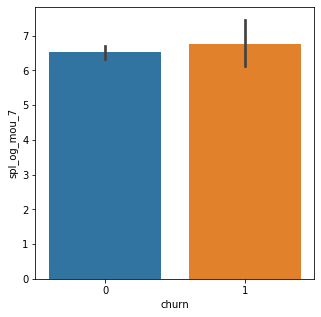

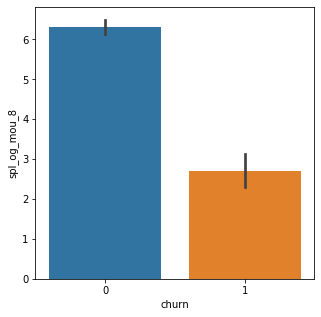

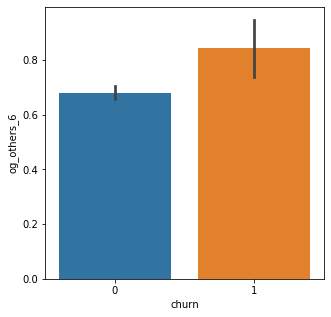

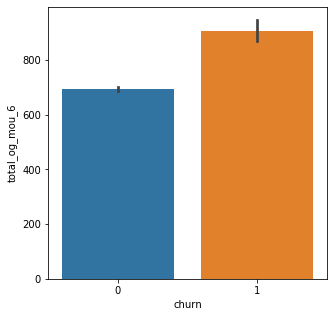

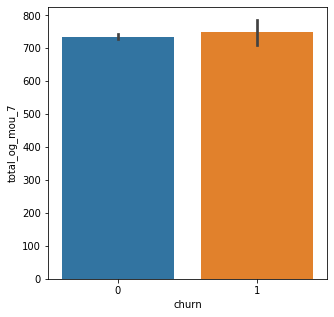

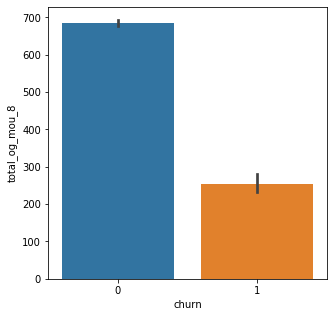

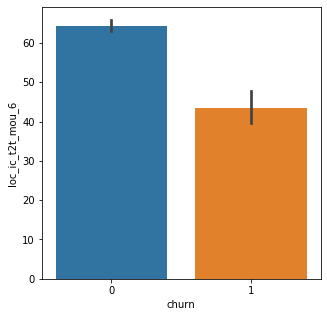

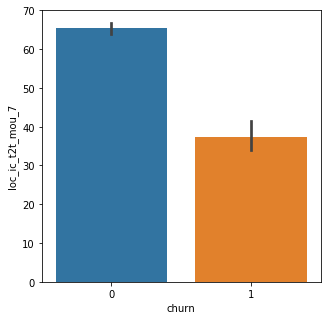

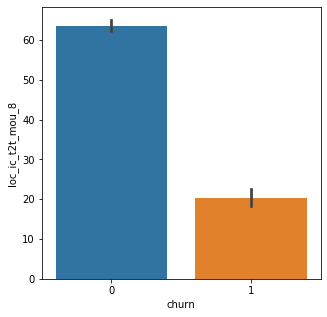

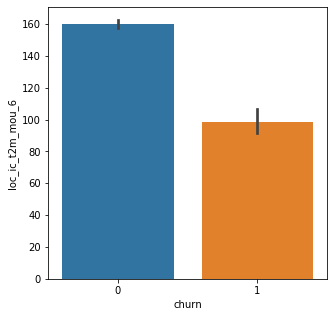

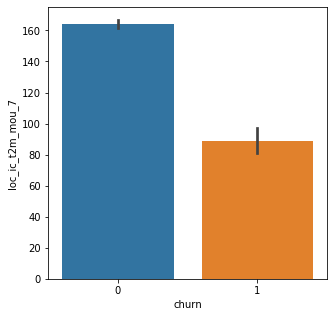

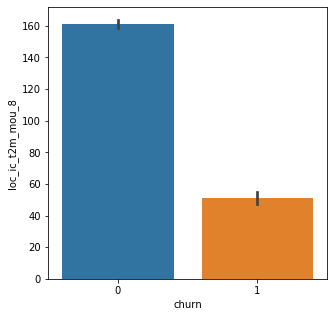

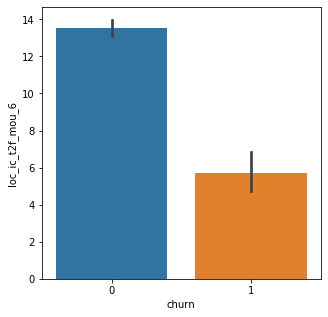

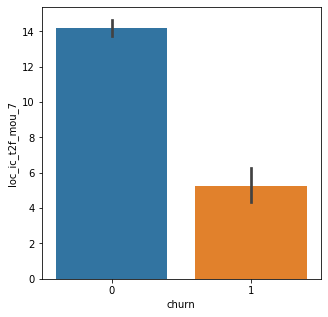

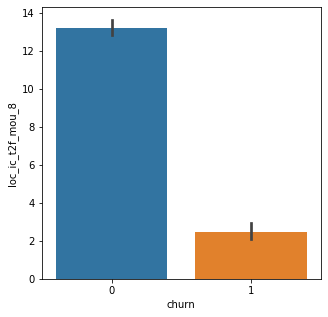

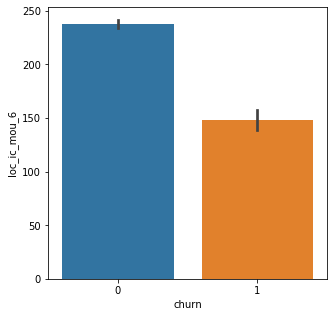

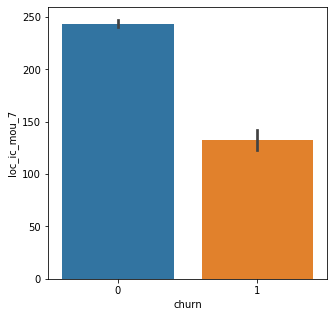

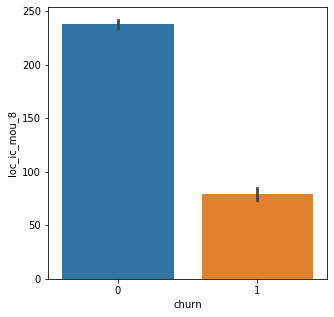

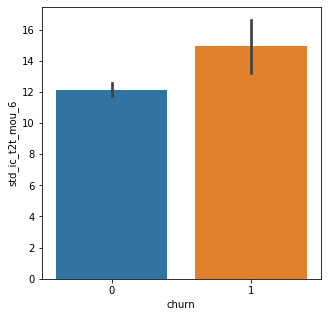

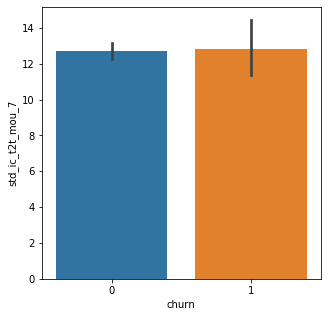

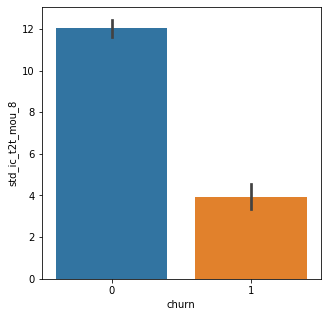

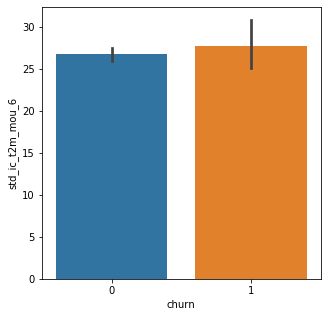

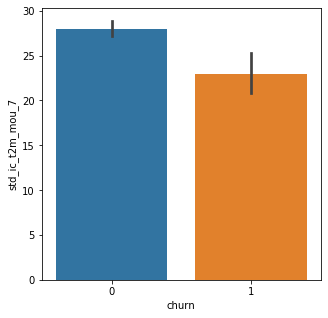

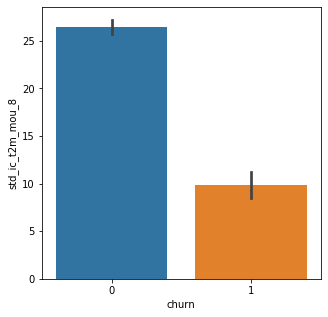

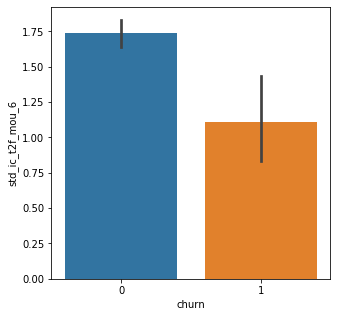

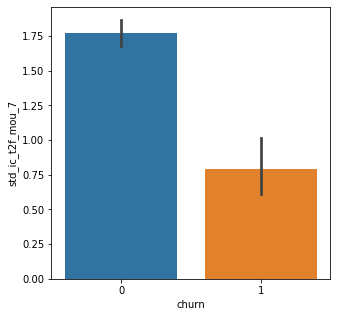

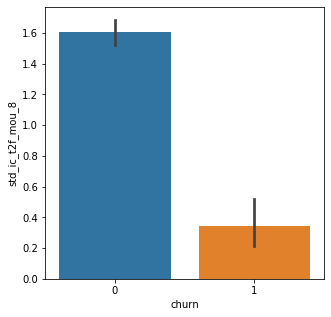

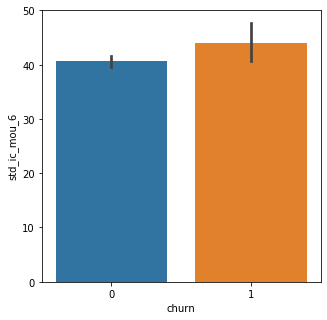

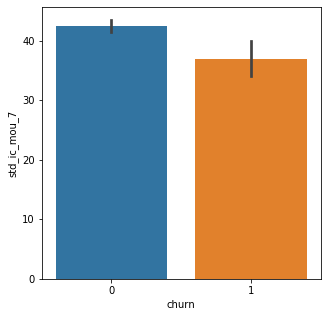

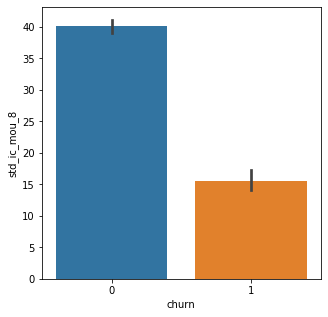

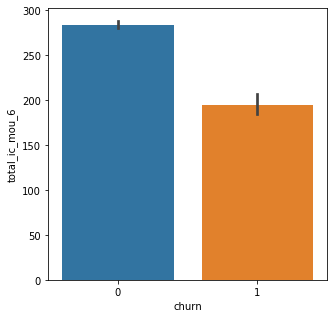

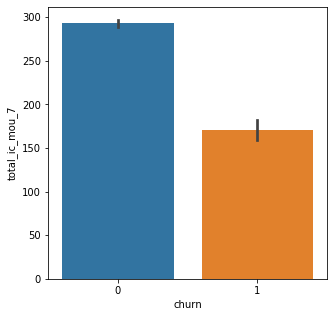

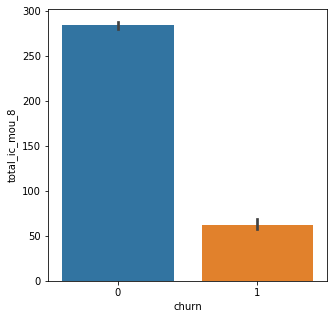

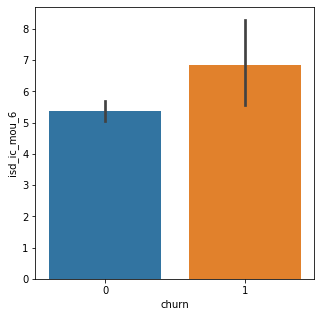

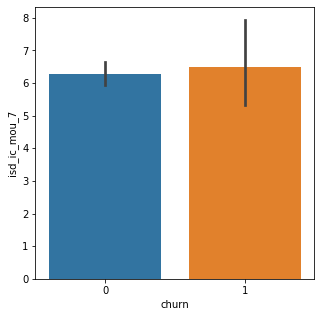

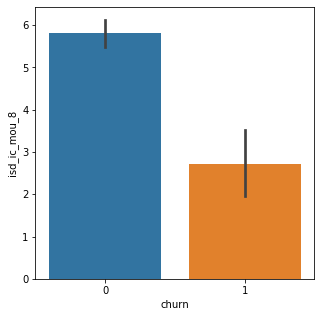

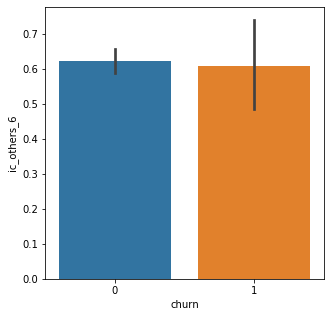

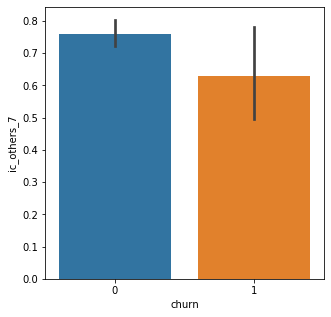

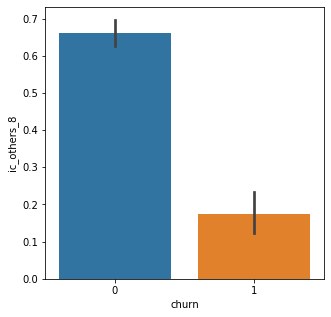

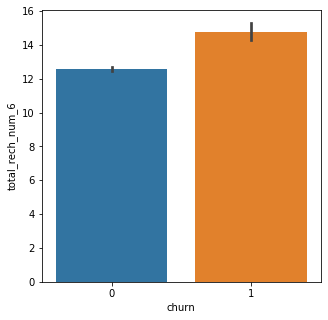

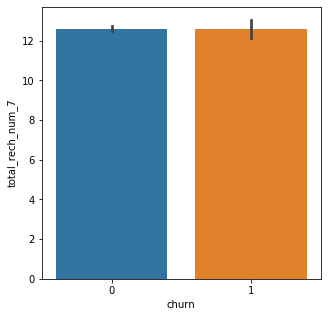

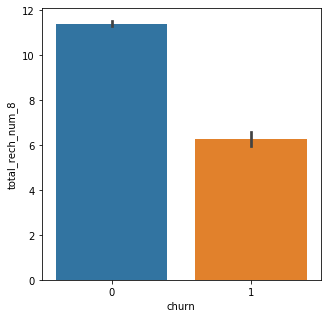

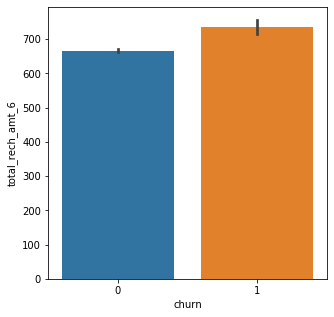

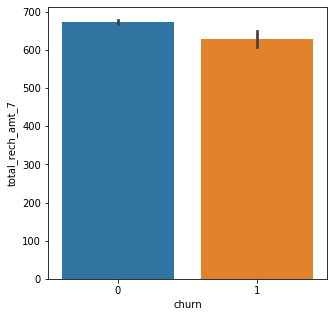

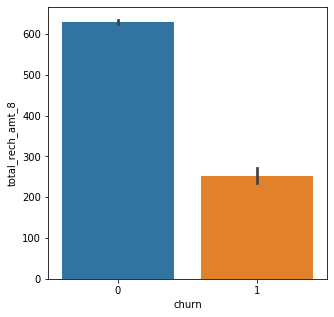

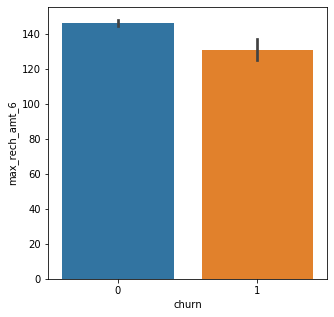

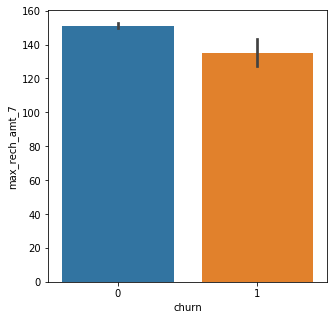

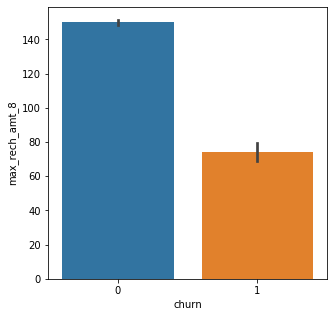

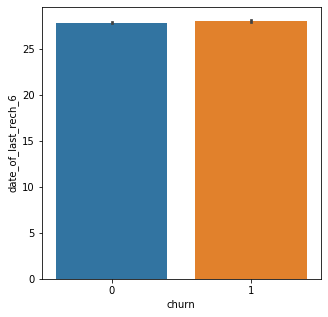

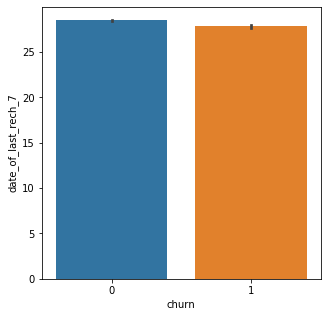

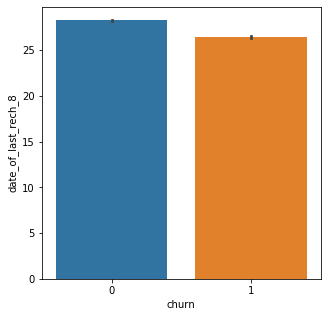

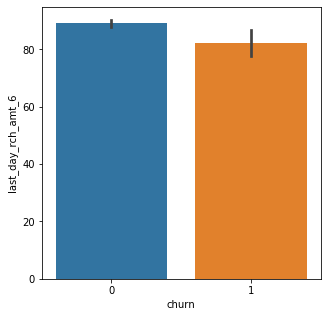

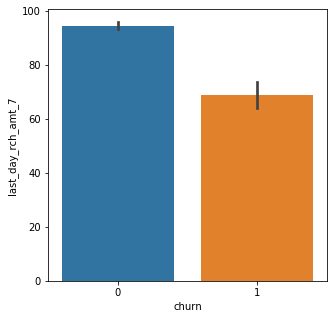

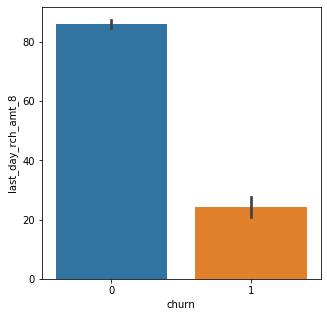

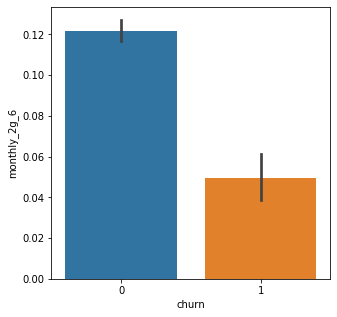

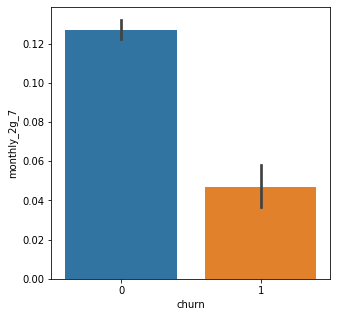

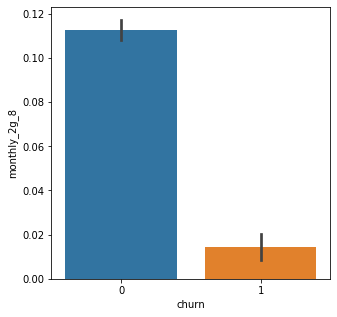

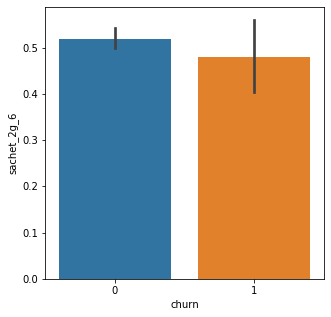

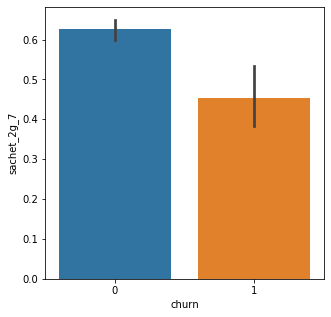

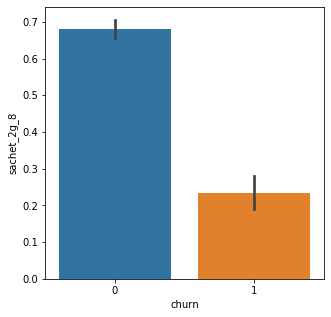

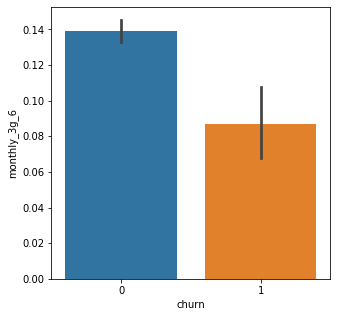

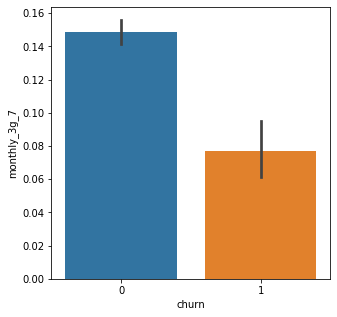

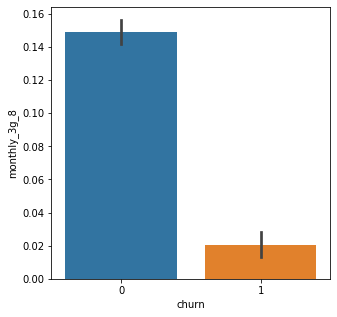

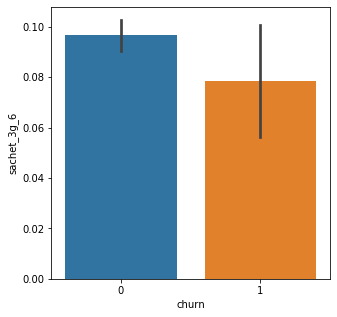

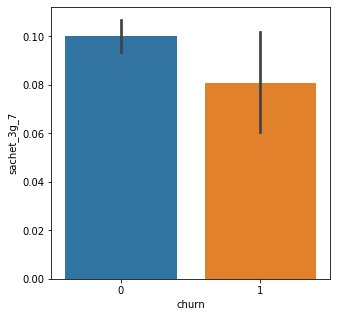

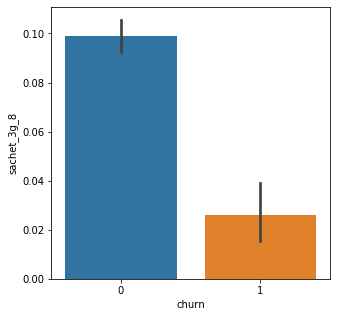

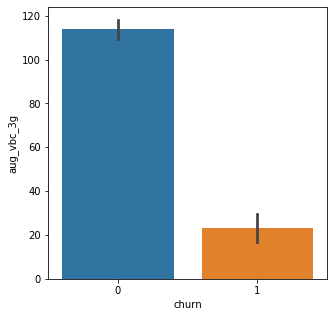

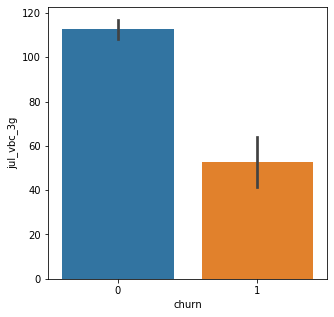

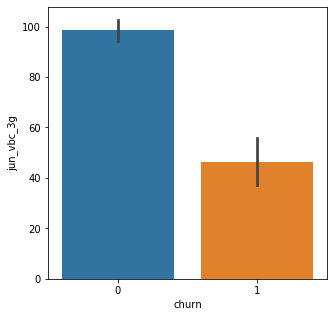

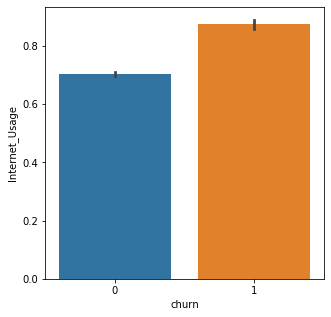

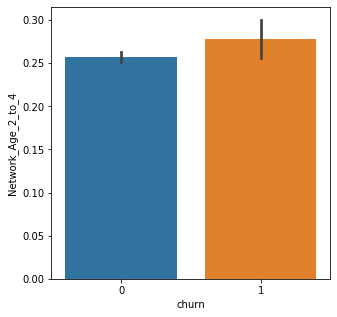

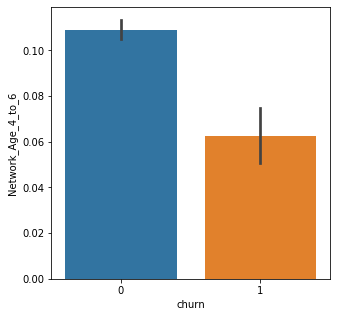

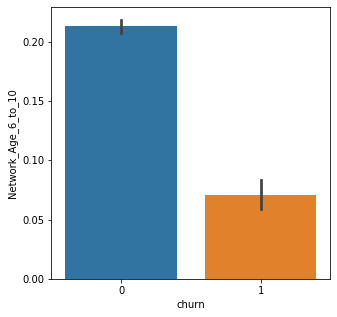

In [48]:
#Comparing all the features with chrun and non-churn customers
count_cols = [col for col in df2.columns if col not in ['churn','mobile_number']]
for col in count_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=df2)
    plt.show()

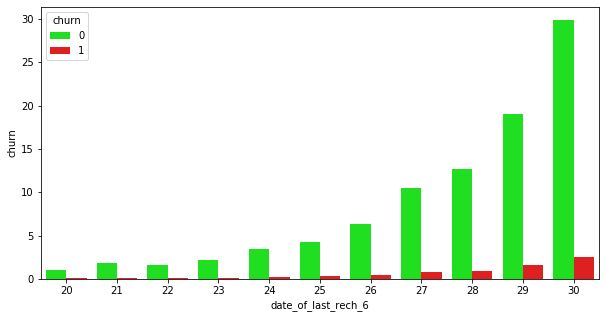

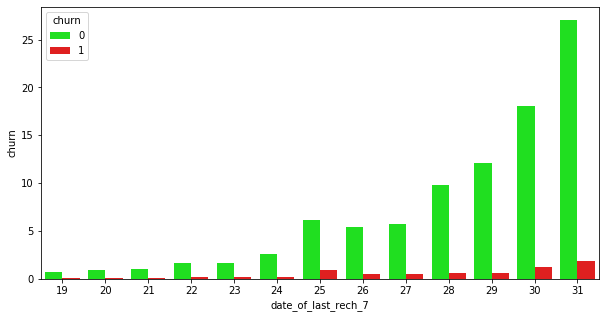

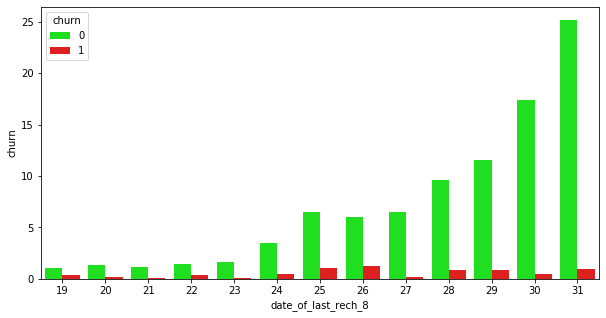

In [49]:
#Checking a feature for both churn and non-churn
plt.figure(figsize=(10,5))
palette = ["#00FF00", "#FF0000"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=df2, palette=palette, estimator=lambda x: len(x) / len(df2) * 100)

plt.figure(figsize=(10,5))
palette = ["#00FF00", "#FF0000"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=df2, palette=palette, 
            estimator=lambda x: len(x) / len(df2) * 100)

plt.figure(figsize=(10,5))
palette = ["#00FF00", "#FF0000"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=df2, palette=palette, 
            estimator=lambda x: len(x) / len(df2) * 100)

### Train-Test Split along with Normalization


In [50]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df2.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = df2['churn']

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Internet_Usage,Network_Age_2_to_4,Network_Age_4_to_6,Network_Age_6_to_10
7,0.292057,0.425923,0.875423,0.011540,0.011559,0.011021,0.089240,0.109178,0.062867,0.01865,...,0.000000,0.000000,0.0,0.014103,0.004595,0.005018,1.0,1.0,0.0,0.0
8,0.128108,0.250457,0.049163,0.082537,0.074203,0.007394,0.018630,0.015521,0.026327,0.00000,...,0.000000,0.000000,0.0,0.005137,0.215916,0.032710,0.0,0.0,0.0,0.0
17,0.202023,0.153633,0.018700,0.236605,0.001962,0.001642,0.012131,0.000000,0.001069,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
21,0.160337,0.272048,0.185433,0.020432,0.027926,0.017945,0.149169,0.172610,0.189693,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
33,0.270174,0.633174,0.123199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.142857,0.428571,0.0,0.087466,0.641792,0.459122,0.0,1.0,0.0,0.0


In [51]:
#X_train, X_test, y_train, y_test splits
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (15676, 119)
y_train dataset:  (15676,)
X_test dataset:  (6719, 119)
y_test dataset:  (6719,)


In [52]:
#Separately counting for churn and non-churn : For train set
print("counts of label '1': {}".format(sum(y_train==1)))
print("counts of label '0': {} \n".format(sum(y_train==0)))

counts of label '1': 1136
counts of label '0': 14540 



In [53]:
#Separately counting for churn and non-churn : For test set
print("counts of label '1': {}".format(sum(y_test==1)))
print("counts of label '0': {} \n".format(sum(y_test==0)))

counts of label '1': 483
counts of label '0': 6236 



### Logistic Regression using RFE

In [54]:
#Running RFE by taking 20 variables(features)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_norm,y)
#Printing the boolean results
print(rfe.support_)          
print(rfe.ranking_)

[False False False False False  True False False  True False  True False
 False False  True False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False  True  True False False  True False False False
 False False False  True False False False False False False False False
  True False  True False False False False False False False False False
 False False False False False False  True False False  True False False
 False False False  True  True False False False False False False False
  True False False  True False False  True False False  True False False
  True False False False False False False False False False False]
[ 35  30  29  36  19   1  38  18   1  96   1  39  62  97   1  66  57  15
  41   7   1  94  33  32  42  87  28  73  89  83  69  88  92  76  20  40
  84  46  59  56   1   1  50  77   1  67  75  27  71  37  21   1  78   5
  64  49   4  25  70  17   1  11   1  14  81   3   2  80

In [55]:
#Finding the imp features
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [56]:
#UDF for calculating vif value
import statsmodels.api as sm
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

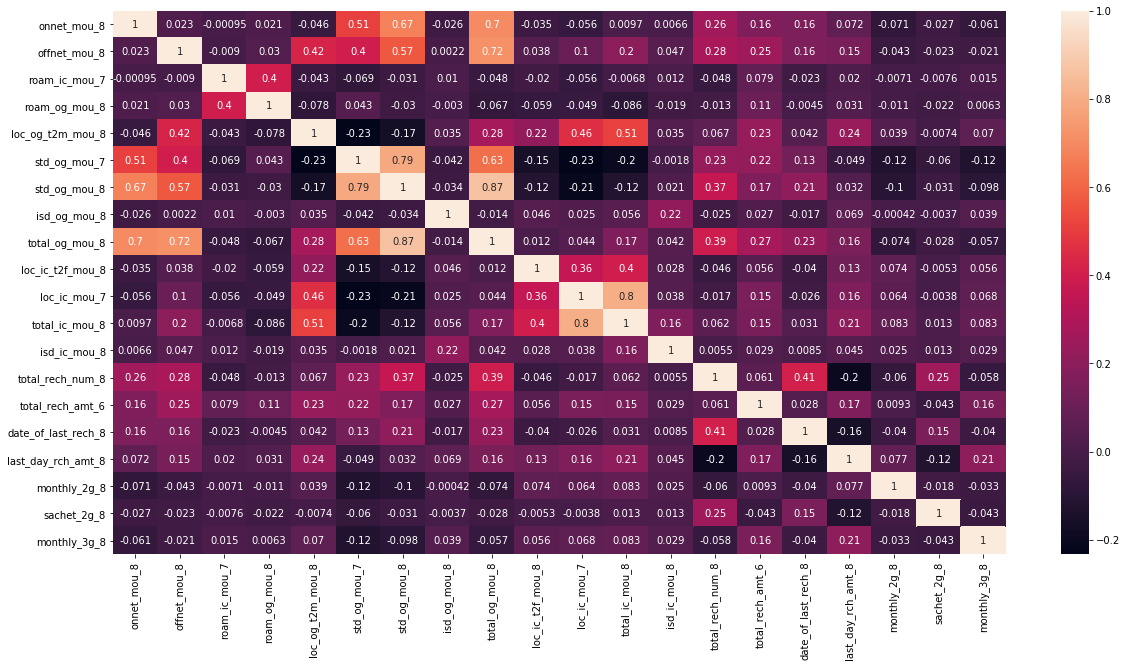

In [57]:
#Checking the correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(X_norm[col].corr(),annot = True)

In [58]:
#Running the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#Making prediction on the test data
pred_probs_test = LR.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [60]:
#Making prediction on the test data
y_predProb = LR.predict_proba(X_test[col])
y_pred_default = LR.predict(X_test[col])

In [61]:
#Making prediction on the test data
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_predProb)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
#Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,86361,0,0.086444
1,2022,0,0.335300
2,78785,0,0.229736
3,4497,1,0.886525
4,9520,0,0.342459


In [62]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.Churn_Prob)
roc = auc(fpr, tpr)
print('ROC_AUC score: ',roc)

ROC_AUC score:  0.8892216702058574


In [63]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,86361,0,0.086444,1,0,0,0,0,0,0,0,0,0
1,2022,0,0.335300,1,1,1,1,0,0,0,0,0,0
2,78785,0,0.229736,1,1,1,0,0,0,0,0,0,0
3,4497,1,0.886525,1,1,1,1,1,1,1,1,1,0
4,9520,0,0.342459,1,1,1,1,0,0,0,0,0,0


In [64]:
#Calculating accuracy,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.071886  1.000000  0.000000
0.1   0.1  0.378628  0.973085  0.332585
0.2   0.2  0.541896  0.937888  0.511225
0.3   0.3  0.667212  0.908903  0.648493
0.4   0.4  0.761423  0.877847  0.752405
0.5   0.5  0.826611  0.826087  0.826652
0.6   0.6  0.868730  0.770186  0.876363
0.7   0.7  0.898794  0.685300  0.915330
0.8   0.8  0.919333  0.509317  0.951090
0.9   0.9  0.931091  0.233954  0.985087


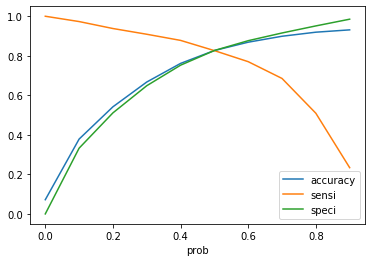

In [65]:
#Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### According to above graph our optimal cutoff should be 0.5 
#### But according to business problem our requirement is to predict the churn customers correctly.
#### Hence we should focus on high sensitivity.
#### Hence we'll consider 0.4 as our cutoff

In [66]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,CustID,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,86361,0,0.086444,1,0,0,0,0,0,0,0,0,0,0
1,2022,0,0.335300,1,1,1,1,0,0,0,0,0,0,0
2,78785,0,0.229736,1,1,1,0,0,0,0,0,0,0,0
3,4497,1,0.886525,1,1,1,1,1,1,1,1,1,0,1
4,9520,0,0.342459,1,1,1,1,0,0,0,0,0,0,0


In [67]:
#Checking the overall accuracy.
round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted),2)

0.76

In [68]:
#Creating new column 'predicted' with 1 if Churn_Prob>0.4 else 0
y_pred_final['pred_churn'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.40 else 0)

y_pred_final.churn.value_counts()

0    6236
1     483
Name: churn, dtype: int64

In [69]:
#Creating confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion

array([[4692, 1544],
       [  59,  424]], dtype=int64)

In [70]:
#Values of confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [71]:
#Checking the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.88

In [72]:
#Calculating specificity of our logistic regression model
round(TN / float(TN+FP),2)

0.75

### Ridge and Lasso Regression(To find the important predictor of churning)

In [73]:
#list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [74]:
#Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [75]:
#Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [76]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.188827,0.060352,0.000998,6.310526e-04,0.0001,{'alpha': 0.0001},-0.126668,-0.124706,-0.124073,-0.122682,...,-0.125049,0.001648,1,-0.125725,-0.124352,-0.125835,-0.124767,-0.123323,-0.124801,0.000928
1,0.007181,0.000746,0.000798,3.988744e-04,0.001,{'alpha': 0.001},-0.131485,-0.132718,-0.131933,-0.130068,...,-0.131888,0.001094,2,-0.132523,-0.130816,-0.132688,-0.131897,-0.130904,-0.131766,0.000786
2,0.005776,0.001716,0.000997,6.310534e-04,0.01,{'alpha': 0.01},-0.132891,-0.136444,-0.133168,-0.133836,...,-0.134392,0.001399,3,-0.135349,-0.133092,-0.135275,-0.134559,-0.133636,-0.134382,0.000893
3,0.005785,0.001163,0.000998,5.352484e-07,0.05,{'alpha': 0.05},-0.132950,-0.136444,-0.133168,-0.133985,...,-0.134434,0.001375,4,-0.135421,-0.133092,-0.135275,-0.134730,-0.133639,-0.134431,0.000917
4,0.004987,0.000631,0.000798,3.987796e-04,0.1,{'alpha': 0.1},-0.132950,-0.136444,-0.133168,-0.133985,...,-0.134434,0.001375,4,-0.135421,-0.133092,-0.135275,-0.134730,-0.133639,-0.134431,0.000917


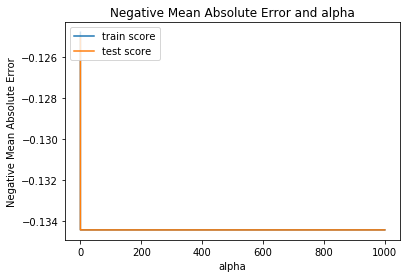

In [77]:
#Plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [78]:
alpha = 0.00155

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col], y_train) 

Lasso(alpha=0.00155, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
col

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [80]:
lasso.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.23856566, -0.        ,  0.        , -0.32192427, -0.        ,
       -0.        , -0.2360888 , -0.        , -0.05712965,  0.06633194,
       -0.12755605, -0.2487574 , -0.051345  , -0.        , -0.        ])

In [81]:
#Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068343,0.124192,0.001193,0.000380,0.0001,{'alpha': 0.0001},-0.120135,-0.117136,-0.116632,-0.116290,...,-0.118179,0.001856,1,-0.118919,-0.117397,-0.119037,-0.117866,-0.116411,-0.117926,0.000980
1,0.004595,0.000499,0.000805,0.000403,0.001,{'alpha': 0.001},-0.120179,-0.117184,-0.116681,-0.116334,...,-0.118225,0.001856,2,-0.118965,-0.117444,-0.119081,-0.117913,-0.116458,-0.117972,0.000979
2,0.004420,0.000388,0.000608,0.000370,0.01,{'alpha': 0.01},-0.120615,-0.117651,-0.117160,-0.116758,...,-0.118675,0.001850,3,-0.119419,-0.117899,-0.119515,-0.118370,-0.116914,-0.118423,0.000973
3,0.005400,0.001361,0.001197,0.000399,0.05,{'alpha': 0.05},-0.122344,-0.119510,-0.119046,-0.118465,...,-0.120461,0.001821,4,-0.121207,-0.119684,-0.121237,-0.120174,-0.118733,-0.120207,0.000950
4,0.004611,0.000497,0.000899,0.000192,0.1,{'alpha': 0.1},-0.124114,-0.121407,-0.120967,-0.120202,...,-0.122280,0.001793,5,-0.123030,-0.121491,-0.123002,-0.122015,-0.120595,-0.122027,0.000927


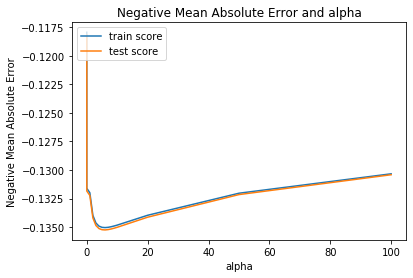

In [83]:
#Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [84]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col], y_train)
ridge.coef_

array([ 0.20552094,  0.25247777,  0.23359652,  0.06793221,  0.04127757,
        0.49706046, -0.13495728,  0.07724421, -0.69965395, -0.04898669,
        0.16947941, -0.43325521,  0.01983444, -0.20560473,  0.27507406,
       -0.12606048, -0.41099322, -0.09566596, -0.12185022, -0.12491675])

##### 1: std_og_mou_7
##### 2: total_og_mou_8
##### 3: total_ic_mou_8
##### 4: total_rech_num_8
##### 5: total_rech_amt_6
##### 6: date_of_last_rech_8
##### 7: last_day_rch_amt_8
##### 8: monthly_2g_8
#### The above are the important predictors for churning, considering LASSO regression

### PCA

In [85]:
#Creating PCA instance on the original dataset
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [86]:
pca.components_

array([[ 7.71095683e-03,  4.52939300e-03,  1.73545800e-02, ...,
        -5.10599660e-01,  6.17047018e-02,  4.56715320e-01],
       [ 1.05051438e-02,  1.00566074e-02,  1.67477987e-02, ...,
         5.85654715e-01, -3.52190991e-02, -3.84110280e-01],
       [ 4.29426936e-03,  9.10750613e-03,  5.47308598e-03, ...,
        -5.22612280e-01,  4.78279872e-01, -6.38090191e-01],
       ...,
       [ 1.78635650e-07, -3.45988133e-07, -2.28475683e-08, ...,
        -4.23915680e-08, -1.00644224e-07, -1.40686555e-07],
       [-2.24763928e-08,  1.92104216e-07, -3.35465616e-07, ...,
         9.91817499e-09, -8.83709621e-09,  1.35867421e-08],
       [ 3.35447009e-07,  4.25845220e-07, -4.97817393e-07, ...,
        -6.06827649e-09,  3.13222135e-10, -1.75915548e-08]])

In [87]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

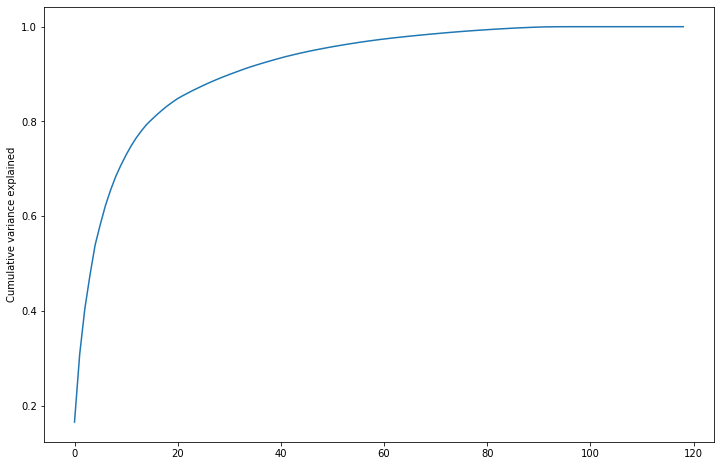

In [88]:
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [89]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(15676, 30)

In [90]:
corrmat = np.corrcoef(df_train_pca.transpose())

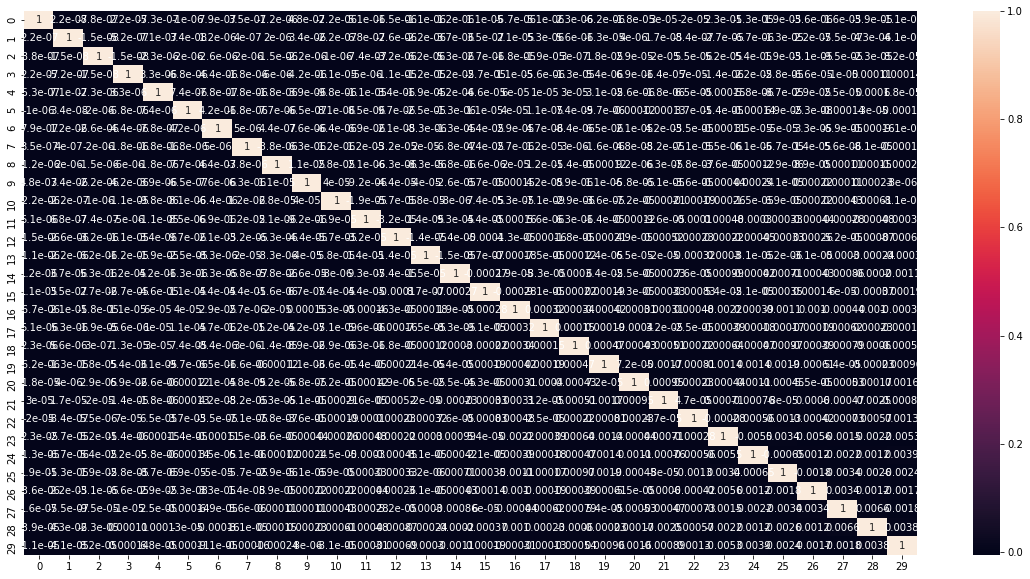

In [91]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [92]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6719, 30)

#### Logistic with PCA

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
learner_pca = LogisticRegression()

In [95]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [96]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [103]:
print("roc_auc_score :",round(metrics.roc_auc_score(y_test, pred_probs_test),2))

roc_auc_score : 0.87


### Random Forest Model(After PCA)

In [104]:
#Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

#Fit
rfc.fit(df_train_pca,y_train)

#Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [105]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[6194,   42],
       [ 426,   57]], dtype=int64)

In [106]:
#True positive
TN = confusion_rf[0,0]
#True negatives
TP = confusion_rf[1,1] 
#False positives
FP = confusion_rf[0,1]
#False negatives
FN = confusion_rf[1,0]

In [107]:
#Sensitivity
print('Sensitivity: ', round((TP / float(TP+FN)),2))

#Specificity
print('Specificity: ',round((TN / float(TN+FP)),2))

#False postive rate - predicting churn when customer does not have churned
print('False postive rate: ',round((FP/ float(TN+FP)),2))

#Positive predictive value 
print('Positive predictive value: ', round((TP / float(TP+FP)),2))

#Negative predictive value
print('Negative predictive value: ',round((TN / float(TN+ FN)),2))

Sensitivity:  0.12
Specificity:  0.99
False postive rate:  0.01
Positive predictive value:  0.58
Negative predictive value:  0.94


#### HyperParameter Tuning

In [108]:
#GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

#Instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


#Fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score =True,n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [109]:
#Scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.425190,0.027818,0.031117,0.005690,2,{'max_depth': 2},0.820791,0.805423,0.788198,0.802233,...,0.805434,0.010669,4,0.823445,0.810860,0.803365,0.796747,0.809664,0.808816,0.008880
1,3.536995,0.140843,0.040095,0.004196,7,{'max_depth': 7},0.895408,0.882297,0.879107,0.901435,...,0.891873,0.009424,3,0.916826,0.910374,0.918906,0.914999,0.913803,0.914982,0.002878
2,4.164685,0.051983,0.044803,0.002023,12,{'max_depth': 12},0.924107,0.931419,0.914195,0.928868,...,0.926193,0.006649,2,0.974801,0.974085,0.975281,0.974484,0.975600,0.974850,0.000542
3,4.210575,0.073548,0.044448,0.001421,17,{'max_depth': 17},0.928890,0.935247,0.924721,0.933333,...,0.931041,0.003779,1,0.989872,0.988199,0.989793,0.989554,0.990990,0.989682,0.000892


In [110]:
pd.DataFrame(scores).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

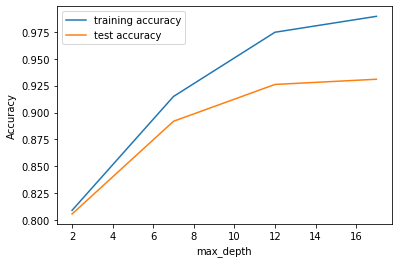

In [111]:
#Plotting accuracies with max_depth
plt.figure()
plt.plot(scores['param_max_depth'], 
         scores['mean_train_score'], 
         label="training accuracy")
plt.plot(scores['param_max_depth'], 
         scores['mean_test_score'], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning n_estimators

In [112]:
#GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

#Instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


#Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score =True,n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [113]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.952407,0.080350,0.045185,0.004401,100,{'n_estimators': 100},0.914541,0.920893,0.905582,0.927592,...,0.918921,0.008078,2,0.959011,0.955586,0.960609,0.957898,0.958616,0.958344,0.001641
1,19.782843,0.362108,0.229397,0.008477,500,{'n_estimators': 500},0.915179,0.918979,0.902392,0.926954,...,0.918347,0.009346,4,0.959729,0.956463,0.962523,0.959971,0.960051,0.959747,0.001931
2,39.027090,3.089924,0.428073,0.069457,900,{'n_estimators': 900},0.915497,0.920893,0.904944,0.927592,...,0.919495,0.008685,1,0.959968,0.958377,0.962842,0.960609,0.960131,0.960385,0.001439
3,57.869687,5.221387,0.600726,0.109297,1300,{'n_estimators': 1300},0.915179,0.920574,0.904625,0.925997,...,0.918729,0.008255,3,0.959888,0.956702,0.962682,0.959573,0.959732,0.959715,0.001894


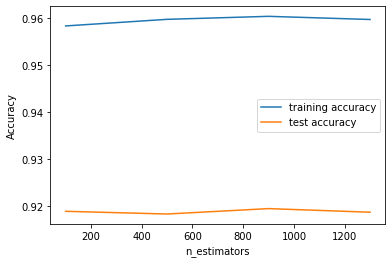

In [114]:
#Plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning max_features

In [115]:
#GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

#Instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


#Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score =True,n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [116]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.376914,0.065316,0.051192,0.006773,4,{'max_features': 4},0.915497,0.920574,0.903349,0.926316,...,0.917964,0.008169,3,0.957895,0.955745,0.961566,0.958377,0.957101,0.958137,0.001932
1,5.959507,0.077702,0.045210,0.003185,8,{'max_features': 8},0.916454,0.918341,0.905263,0.928868,...,0.918602,0.007975,1,0.962281,0.956941,0.962204,0.960848,0.961167,0.960688,0.001956
2,10.285027,0.116399,0.044908,0.006349,14,{'max_features': 14},0.913265,0.921212,0.906220,0.925678,...,0.917836,0.007119,4,0.963397,0.959892,0.964596,0.962603,0.961726,0.962443,0.001587
3,14.388611,0.123132,0.048520,0.015174,20,{'max_features': 20},0.912309,0.924402,0.904306,0.923445,...,0.917964,0.008303,2,0.963955,0.961407,0.964277,0.961247,0.963799,0.962937,0.001325
4,17.088503,0.433792,0.040193,0.001848,24,{'max_features': 24},0.913584,0.922169,0.906858,0.921850,...,0.917198,0.006084,5,0.961563,0.959413,0.964038,0.963001,0.962842,0.962171,0.001587


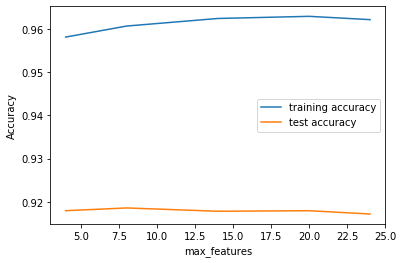

In [117]:
#Plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

In [118]:
#GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

#Instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


#Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score =True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [119]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.996945,0.041091,0.037590,0.001636,100,{'min_samples_leaf': 100},0.870536,0.875598,0.859649,0.874960,...,0.871906,0.006670,1,0.883573,0.884379,0.887011,0.877841,0.880632,0.882687,0.003164
1,2.785430,0.055947,0.037204,0.001213,150,{'min_samples_leaf': 150},0.862245,0.861563,0.846571,0.868581,...,0.860934,0.007612,2,0.872249,0.869548,0.874890,0.872817,0.866119,0.871125,0.003028
2,2.628521,0.029530,0.035191,0.001918,200,{'min_samples_leaf': 200},0.852997,0.856140,0.844976,0.848166,...,0.851556,0.004323,3,0.860447,0.862611,0.863249,0.852245,0.855354,0.858781,0.004286
3,2.479014,0.012296,0.037314,0.002558,250,{'min_samples_leaf': 250},0.847258,0.846571,0.832536,0.841148,...,0.843008,0.005732,4,0.853828,0.852484,0.856630,0.848736,0.849215,0.852179,0.002942
4,2.383905,0.058615,0.036198,0.001594,300,{'min_samples_leaf': 300},0.835140,0.839234,0.835407,0.840510,...,0.838160,0.002404,5,0.842424,0.842676,0.853441,0.843154,0.839088,0.844157,0.004860


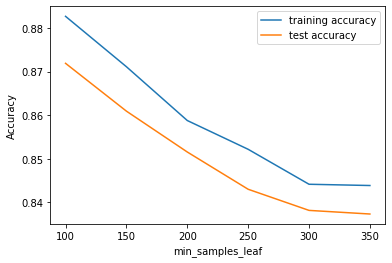

In [120]:
#Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_split

In [121]:
#GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score =True,n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [122]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.577965,0.045888,0.041105,0.001444,200,{'min_samples_split': 200},0.890306,0.888995,0.874960,0.893461,...,0.887981,0.006689,1,0.911483,0.909656,0.910613,0.905111,0.904154,0.908204,0.002988
1,3.511998,0.035768,0.040164,0.002945,250,{'min_samples_split': 250},0.882015,0.875279,0.869219,0.890590,...,0.881028,0.007925,2,0.900877,0.895383,0.901443,0.898094,0.897217,0.898603,0.002271
2,3.421780,0.036243,0.040610,0.001881,300,{'min_samples_split': 300},0.876913,0.867624,0.866029,0.881659,...,0.874521,0.006492,3,0.892982,0.885655,0.897377,0.887649,0.888286,0.890390,0.004240
3,3.296857,0.040104,0.036702,0.001086,350,{'min_samples_split': 350},0.876276,0.873684,0.866986,0.875598,...,0.874011,0.003725,4,0.889314,0.886452,0.892592,0.883662,0.880791,0.886562,0.004139
4,3.222618,0.028452,0.040937,0.005672,400,{'min_samples_split': 400},0.867347,0.859649,0.853270,0.870494,...,0.864315,0.006832,5,0.879027,0.875209,0.880791,0.878239,0.874492,0.877552,0.002366


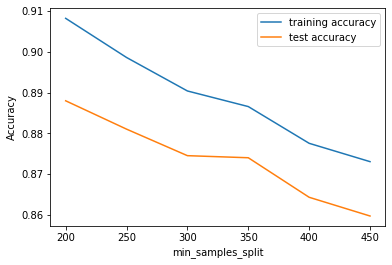

In [123]:
#Plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Grid search to find optimal parameters

In [124]:
#Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
#Create a based model
rf = RandomForestClassifier(class_weight='balanced')

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [125]:
#Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
                                              oob_score=False,
                                              ra

In [126]:
#Printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.867887189564821 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [127]:
#Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [128]:
#Fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
#Predict
y_pred_default = rfc.predict(df_test_pca)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      6236
           1       0.29      0.70      0.41       483

    accuracy                           0.86      6719
   macro avg       0.63      0.78      0.67      6719
weighted avg       0.93      0.86      0.88      6719

[[5430  806]
 [ 146  337]]
Accuracy_score:   0.8583122488465545


In [131]:
#Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[5430,  806],
       [ 146,  337]], dtype=int64)

#### Hence we have used Logistic Regression for Business analysis and have done PCA on the original data set then have done Random Forest model to do the predictive analysis.